<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/AG_HLC_27pairs_2_2_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#License: GPL 
#Creator: Mike Smith https://github.com/gomlfx 
#designed for colab/kaggle/Jupyter

In [1]:
#!pip install autogluon
#!pip install --upgrade mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 189 kB 5.1 MB/s 
     |████████████████████████████████| 267 kB 49.5 MB/s 
     |████████████████████████████████| 48 kB 5.2 MB/s 
     |████████████████████████████████| 162 kB 50.3 MB/s 
     |████████████████████████████████| 59 kB 5.1 MB/s 
     |████████████████████████████████| 1.0 MB 57.8 MB/s 
     |████████████████████████████████| 38.1 MB 218 kB/s 
     |████████████████████████████████| 1.0 MB 41.9 MB/s 
     |████████████████████████████████| 802 kB 55.9 MB/s 
     |████████████████████████████████| 132 kB 53.9 MB/s 
     |████████████████████████████████| 59.6 MB 1.2 MB/s 
     |████████████████████████████████| 296 kB 58.1 MB/s 
     |████████████████████████████████| 2.0 MB 55.7 MB/s 
     |████████████████████████████████| 166.7 MB 15 kB/s 
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:39tcmalloc: large alloc 114

In [2]:
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [3]:
#metatrader5 file formatv'
df=pd.read_table('/content/USDCHF_H1_197101040000_202206030400.csv')

In [ ]:
print(df.head())
print(df.tail())
df.info()

       <DATE>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  <TICKVOL>  <VOL>  <SPREAD>
0  1971.01.04  4.3180  4.3180  4.3180   4.3180          1      0        50
1  1971.01.05  4.3117  4.3117  4.3117   4.3117          1      0        50
2  1971.01.06  4.3113  4.3113  4.3113   4.3113          1      0        50
3  1971.01.07  4.3103  4.3103  4.3103   4.3103          1      0        50
4  1971.01.08  4.3109  4.3109  4.3109   4.3109          1      0        50
           <DATE>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
13189  2022.05.10  0.99372  0.99749  0.99056  0.99559      61241      0   
13190  2022.05.11  0.99515  0.99640  0.98722  0.99395      73826      0   
13191  2022.05.12  0.99410  1.00493  0.99166  1.00249      70937      0   
13192  2022.05.13  1.00249  1.00468  0.99922  1.00199      59210      0   
13193  2022.05.16  1.00051  1.00209  1.00044  1.00205        176      0   

       <SPREAD>  
13189         0  
13190         0  
13191         0  
13192         0  
13193    

In [ ]:
df

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,1971.01.04,4.31800,4.31800,4.31800,4.31800,1,0,50
1,1971.01.05,4.31170,4.31170,4.31170,4.31170,1,0,50
2,1971.01.06,4.31130,4.31130,4.31130,4.31130,1,0,50
3,1971.01.07,4.31030,4.31030,4.31030,4.31030,1,0,50
4,1971.01.08,4.31090,4.31090,4.31090,4.31090,1,0,50
...,...,...,...,...,...,...,...,...
13189,2022.05.10,0.99372,0.99749,0.99056,0.99559,61241,0,0
13190,2022.05.11,0.99515,0.99640,0.98722,0.99395,73826,0,0
13191,2022.05.12,0.99410,1.00493,0.99166,1.00249,70937,0,0
13192,2022.05.13,1.00249,1.00468,0.99922,1.00199,59210,0,0


In [ ]:
d = df[["<OPEN>","<HIGH>","<LOW>","<CLOSE>"]]
df = pd.DataFrame(data=d)
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,4.31800,4.31800,4.31800,4.31800
1,4.31170,4.31170,4.31170,4.31170
2,4.31130,4.31130,4.31130,4.31130
3,4.31030,4.31030,4.31030,4.31030
4,4.31090,4.31090,4.31090,4.31090
...,...,...,...,...
13189,0.99372,0.99749,0.99056,0.99559
13190,0.99515,0.99640,0.98722,0.99395
13191,0.99410,1.00493,0.99166,1.00249
13192,1.00249,1.00468,0.99922,1.00199


In [ ]:
df_raw1 = pd.DataFrame(data=df)
df_raw1

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,4.31800,4.31800,4.31800,4.31800
1,4.31170,4.31170,4.31170,4.31170
2,4.31130,4.31130,4.31130,4.31130
3,4.31030,4.31030,4.31030,4.31030
4,4.31090,4.31090,4.31090,4.31090
...,...,...,...,...
13189,0.99372,0.99749,0.99056,0.99559
13190,0.99515,0.99640,0.98722,0.99395
13191,0.99410,1.00493,0.99166,1.00249
13192,1.00249,1.00468,0.99922,1.00199


In [ ]:
stop_df = pd.DataFrame(data=df.tail(20))  
stop_df.iloc[:-1] 
stop_df1 = stop_df[stop_df['<OPEN>'] > stop_df['<CLOSE>']]
print(stop_df1)

stop_df2 = stop_df[stop_df['<OPEN>'] < stop_df['<CLOSE>']]
print(stop_df2)


        <OPEN>   <HIGH>    <LOW>  <CLOSE>
13175  0.95178  0.95361  0.94545  0.94839
13185  0.97882  0.98522  0.97203  0.97206
13190  0.99515  0.99640  0.98722  0.99395
13192  1.00249  1.00468  0.99922  1.00199
        <OPEN>   <HIGH>    <LOW>  <CLOSE>
13174  0.94438  0.95231  0.94292  0.95204
13176  0.94829  0.95534  0.94570  0.95319
13177  0.95317  0.95931  0.95277  0.95660
13178  0.95751  0.95973  0.95470  0.95931
13179  0.95930  0.96265  0.95645  0.96236
13180  0.96217  0.97017  0.96144  0.96897
13181  0.96894  0.97593  0.96583  0.97183
13182  0.97218  0.97366  0.96709  0.97335
13183  0.96925  0.97894  0.96921  0.97782
13184  0.97765  0.97994  0.97206  0.97886
13186  0.97199  0.98899  0.97091  0.98483
13187  0.98481  0.98925  0.98273  0.98845
13188  0.98663  0.99655  0.98591  0.99365
13189  0.99372  0.99749  0.99056  0.99559
13191  0.99410  1.00493  0.99166  1.00249
13193  1.00051  1.00209  1.00044  1.00205


In [ ]:

stop_df1['stop_for_sell'] = stop_df1['<HIGH>'] - stop_df1['<OPEN>']
print(stop_df1.stop_for_sell)

stop_df2['stop_for_buy'] = stop_df2['<OPEN>'] - stop_df2['<LOW>']
print(stop_df2.stop_for_buy)

13175    0.00183
13185    0.00640
13190    0.00125
13192    0.00219
Name: stop_for_sell, dtype: float64
13174    0.00146
13176    0.00259
13177    0.00040
13178    0.00281
13179    0.00285
13180    0.00073
13181    0.00311
13182    0.00509
13183    0.00004
13184    0.00559
13186    0.00108
13187    0.00208
13188    0.00072
13189    0.00316
13191    0.00244
13193    0.00007
Name: stop_for_buy, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
stop_for_sell = stop_df1.stop_for_sell.describe(percentiles=[.25,.5,.75,.9,.95,.99])
stop_for_buy = stop_df2.stop_for_buy.describe(percentiles=[.25,.5,.75,.9,.95,.99])
 

In [ ]:
print(stop_for_sell)
print(stop_for_buy)

count    4.000000
mean     0.002917
std      0.002354
min      0.001250
25%      0.001685
50%      0.002010
75%      0.003242
90%      0.005137
95%      0.005768
99%      0.006274
max      0.006400
Name: stop_for_sell, dtype: float64
count    16.000000
mean      0.002139
std       0.001656
min       0.000040
25%       0.000728
50%       0.002260
75%       0.002915
90%       0.004125
95%       0.005215
99%       0.005515
max       0.005590
Name: stop_for_buy, dtype: float64


In [ ]:
df.rename({'<OPEN>':'p_o','<HIGH>':'p_h','<LOW>':'p_l','<CLOSE>':'p_c'}, axis='columns', inplace=True)

In [ ]:
df.info

<bound method DataFrame.info of            p_o      p_h      p_l      p_c
0      4.31800  4.31800  4.31800  4.31800
1      4.31170  4.31170  4.31170  4.31170
2      4.31130  4.31130  4.31130  4.31130
3      4.31030  4.31030  4.31030  4.31030
4      4.31090  4.31090  4.31090  4.31090
...        ...      ...      ...      ...
13189  0.99372  0.99749  0.99056  0.99559
13190  0.99515  0.99640  0.98722  0.99395
13191  0.99410  1.00493  0.99166  1.00249
13192  1.00249  1.00468  0.99922  1.00199
13193  1.00051  1.00209  1.00044  1.00205

[13194 rows x 4 columns]>

In [ ]:
print(df.columns)

Index(['p_o', 'p_h', 'p_l', 'p_c'], dtype='object')


In [ ]:
#Features, only last period hlc version



# #380 periods ago
# df['p_Open_last_period380'] = df['p_o'].shift(380) 
# df['p_High_last_period380'] = df['p_h'].shift(380)
# df['p_Low_last_period380'] = df['p_l'].shift(380)
# df['p_Close_last_period380'] = df['p_c'].shift(380)
# #379 periods ago
# df['p_Open_last_period379'] = df['p_o'].shift(379) 
# df['p_High_last_period379'] = df['p_h'].shift(379)
# df['p_Low_last_period379'] = df['p_l'].shift(379)
# df['p_Close_last_period379'] = df['p_c'].shift(379)
# #378 periods ago
# df['p_Open_last_period378'] = df['p_o'].shift(378) 
# df['p_High_last_period378'] = df['p_h'].shift(378)
# df['p_Low_last_period378'] = df['p_l'].shift(378)
# df['p_Close_last_period378'] = df['p_c'].shift(378)
# #377 periods ago
# df['p_Open_last_period377'] = df['p_o'].shift(377) 
# df['p_High_last_period377'] = df['p_h'].shift(377)
# df['p_Low_last_period377'] = df['p_l'].shift(377)
# df['p_Close_last_period377'] = df['p_c'].shift(377)
# #376 periods ago
# df['p_Open_last_period376'] = df['p_o'].shift(376) 
# df['p_High_last_period376'] = df['p_h'].shift(376)
# df['p_Low_last_period376'] = df['p_l'].shift(376)
# df['p_Close_last_period376'] = df['p_c'].shift(376)
# #375 periods ago
# df['p_Open_last_period375'] = df['p_o'].shift(375) 
# df['p_High_last_period375'] = df['p_h'].shift(375)
# df['p_Low_last_period375'] = df['p_l'].shift(375)
# df['p_Close_last_period375'] = df['p_c'].shift(375)
# #374 periods ago
# df['p_Open_last_period374'] = df['p_o'].shift(374) 
# df['p_High_last_period374'] = df['p_h'].shift(374)
# df['p_Low_last_period374'] = df['p_l'].shift(374)
# df['p_Close_last_period374'] = df['p_c'].shift(374)
# #373 periods ago
# df['p_Open_last_period373'] = df['p_o'].shift(373) 
# df['p_High_last_period373'] = df['p_h'].shift(373)
# df['p_Low_last_period373'] = df['p_l'].shift(373)
# df['p_Close_last_period373'] = df['p_c'].shift(373)
# #372 periods ago
# df['p_Open_last_period372'] = df['p_o'].shift(372) 
# df['p_High_last_period372'] = df['p_h'].shift(372)
# df['p_Low_last_period372'] = df['p_l'].shift(372)
# df['p_Close_last_period372'] = df['p_c'].shift(372)
# #371 periods ago
# df['p_Open_last_period371'] = df['p_o'].shift(371) 
# df['p_High_last_period371'] = df['p_h'].shift(371)
# df['p_Low_last_period371'] = df['p_l'].shift(371)
# df['p_Close_last_period371'] = df['p_c'].shift(371)
# #370 periods ago
# df['p_Open_last_period370'] = df['p_o'].shift(370) 
# df['p_High_last_period370'] = df['p_h'].shift(370)
# df['p_Low_last_period370'] = df['p_l'].shift(370)
# df['p_Close_last_period370'] = df['p_c'].shift(370)
# #369 periods ago
# df['p_Open_last_period369'] = df['p_o'].shift(369) 
# df['p_High_last_period369'] = df['p_h'].shift(369)
# df['p_Low_last_period369'] = df['p_l'].shift(369)
# df['p_Close_last_period369'] = df['p_c'].shift(369)
# #368 periods ago
# df['p_Open_last_period368'] = df['p_o'].shift(368) 
# df['p_High_last_period368'] = df['p_h'].shift(368)
# df['p_Low_last_period368'] = df['p_l'].shift(368)
# df['p_Close_last_period368'] = df['p_c'].shift(368)
# #367 periods ago
# df['p_Open_last_period367'] = df['p_o'].shift(367) 
# df['p_High_last_period367'] = df['p_h'].shift(367)
# df['p_Low_last_period367'] = df['p_l'].shift(367)
# df['p_Close_last_period367'] = df['p_c'].shift(367)
# #366 periods ago
# df['p_Open_last_period366'] = df['p_o'].shift(366) 
# df['p_High_last_period366'] = df['p_h'].shift(366)
# df['p_Low_last_period366'] = df['p_l'].shift(366)
# df['p_Close_last_period366'] = df['p_c'].shift(366)
# #365 periods ago
# df['p_Open_last_period365'] = df['p_o'].shift(365) 
# df['p_High_last_period365'] = df['p_h'].shift(365)
# df['p_Low_last_period365'] = df['p_l'].shift(365)
# df['p_Close_last_period365'] = df['p_c'].shift(365)
# #364 periods ago
# df['p_Open_last_period364'] = df['p_o'].shift(364) 
# df['p_High_last_period364'] = df['p_h'].shift(364)
# df['p_Low_last_period364'] = df['p_l'].shift(364)
# df['p_Close_last_period364'] = df['p_c'].shift(364)
# #363 periods ago
# df['p_Open_last_period363'] = df['p_o'].shift(363) 
# df['p_High_last_period363'] = df['p_h'].shift(363)
# df['p_Low_last_period363'] = df['p_l'].shift(363)
# df['p_Close_last_period363'] = df['p_c'].shift(363)
# #362 periods ago
# df['p_Open_last_period362'] = df['p_o'].shift(362) 
# df['p_High_last_period362'] = df['p_h'].shift(362)
# df['p_Low_last_period362'] = df['p_l'].shift(362)
# df['p_Close_last_period362'] = df['p_c'].shift(362)
# #361 periods ago
# df['p_Open_last_period361'] = df['p_o'].shift(361) 
# df['p_High_last_period361'] = df['p_h'].shift(361)
# df['p_Low_last_period361'] = df['p_l'].shift(361)
# df['p_Close_last_period361'] = df['p_c'].shift(361)
# #360 periods ago
# df['p_Open_last_period360'] = df['p_o'].shift(360) 
# df['p_High_last_period360'] = df['p_h'].shift(360)
# df['p_Low_last_period360'] = df['p_l'].shift(360)
# df['p_Close_last_period360'] = df['p_c'].shift(360)
# #359 periods ago
# df['p_Open_last_period359'] = df['p_o'].shift(359) 
# df['p_High_last_period359'] = df['p_h'].shift(359)
# df['p_Low_last_period359'] = df['p_l'].shift(359)
# df['p_Close_last_period359'] = df['p_c'].shift(359)
# #358 periods ago
# df['p_Open_last_period358'] = df['p_o'].shift(358) 
# df['p_High_last_period358'] = df['p_h'].shift(358)
# df['p_Low_last_period358'] = df['p_l'].shift(358)
# df['p_Close_last_period358'] = df['p_c'].shift(358)
# #357 periods ago
# df['p_Open_last_period357'] = df['p_o'].shift(357) 
# df['p_High_last_period357'] = df['p_h'].shift(357)
# df['p_Low_last_period357'] = df['p_l'].shift(357)
# df['p_Close_last_period357'] = df['p_c'].shift(357)
# #356 periods ago
# df['p_Open_last_period356'] = df['p_o'].shift(356) 
# df['p_High_last_period356'] = df['p_h'].shift(356)
# df['p_Low_last_period356'] = df['p_l'].shift(356)
# df['p_Close_last_period356'] = df['p_c'].shift(356)
# #355 periods ago
# df['p_Open_last_period355'] = df['p_o'].shift(355) 
# df['p_High_last_period355'] = df['p_h'].shift(355)
# df['p_Low_last_period355'] = df['p_l'].shift(355)
# df['p_Close_last_period355'] = df['p_c'].shift(355)
# #354 periods ago
# df['p_Open_last_period354'] = df['p_o'].shift(354) 
# df['p_High_last_period354'] = df['p_h'].shift(354)
# df['p_Low_last_period354'] = df['p_l'].shift(354)
# df['p_Close_last_period354'] = df['p_c'].shift(354)
# #353 periods ago
# df['p_Open_last_period353'] = df['p_o'].shift(353) 
# df['p_High_last_period353'] = df['p_h'].shift(353)
# df['p_Low_last_period353'] = df['p_l'].shift(353)
# df['p_Close_last_period353'] = df['p_c'].shift(353)
# #352 periods ago
# df['p_Open_last_period352'] = df['p_o'].shift(352) 
# df['p_High_last_period352'] = df['p_h'].shift(352)
# df['p_Low_last_period352'] = df['p_l'].shift(352)
# df['p_Close_last_period352'] = df['p_c'].shift(352)
# #351 periods ago
# df['p_Open_last_period351'] = df['p_o'].shift(351) 
# df['p_High_last_period351'] = df['p_h'].shift(351)
# df['p_Low_last_period351'] = df['p_l'].shift(351)
# df['p_Close_last_period351'] = df['p_c'].shift(351)
# #350 periods ago
# df['p_Open_last_period350'] = df['p_o'].shift(350) 
# df['p_High_last_period350'] = df['p_h'].shift(350)
# df['p_Low_last_period350'] = df['p_l'].shift(350)
# df['p_Close_last_period350'] = df['p_c'].shift(350)
# #349 periods ago
# df['p_Open_last_period349'] = df['p_o'].shift(349) 
# df['p_High_last_period349'] = df['p_h'].shift(349)
# df['p_Low_last_period349'] = df['p_l'].shift(349)
# df['p_Close_last_period349'] = df['p_c'].shift(349)
# #348 periods ago
# df['p_Open_last_period348'] = df['p_o'].shift(348) 
# df['p_High_last_period348'] = df['p_h'].shift(348)
# df['p_Low_last_period348'] = df['p_l'].shift(348)
# df['p_Close_last_period348'] = df['p_c'].shift(348)
# #347 periods ago
# df['p_Open_last_period347'] = df['p_o'].shift(347) 
# df['p_High_last_period347'] = df['p_h'].shift(347)
# df['p_Low_last_period347'] = df['p_l'].shift(347)
# df['p_Close_last_period347'] = df['p_c'].shift(347)
# #346 periods ago
# df['p_Open_last_period346'] = df['p_o'].shift(346) 
# df['p_High_last_period346'] = df['p_h'].shift(346)
# df['p_Low_last_period346'] = df['p_l'].shift(346)
# df['p_Close_last_period346'] = df['p_c'].shift(346)
# #345 periods ago
# df['p_Open_last_period345'] = df['p_o'].shift(345) 
# df['p_High_last_period345'] = df['p_h'].shift(345)
# df['p_Low_last_period345'] = df['p_l'].shift(345)
# df['p_Close_last_period345'] = df['p_c'].shift(345)
# #344 periods ago
# df['p_Open_last_period344'] = df['p_o'].shift(344) 
# df['p_High_last_period344'] = df['p_h'].shift(344)
# df['p_Low_last_period344'] = df['p_l'].shift(344)
# df['p_Close_last_period344'] = df['p_c'].shift(344)
# #343 periods ago
# df['p_Open_last_period343'] = df['p_o'].shift(343) 
# df['p_High_last_period343'] = df['p_h'].shift(343)
# df['p_Low_last_period343'] = df['p_l'].shift(343)
# df['p_Close_last_period343'] = df['p_c'].shift(343)
# #342 periods ago
# df['p_Open_last_period342'] = df['p_o'].shift(342) 
# df['p_High_last_period342'] = df['p_h'].shift(342)
# df['p_Low_last_period342'] = df['p_l'].shift(342)
# df['p_Close_last_period342'] = df['p_c'].shift(342)
# #341 periods ago
# df['p_Open_last_period341'] = df['p_o'].shift(341) 
# df['p_High_last_period341'] = df['p_h'].shift(341)
# df['p_Low_last_period341'] = df['p_l'].shift(341)
# df['p_Close_last_period341'] = df['p_c'].shift(341)
# #340 periods ago
# df['p_Open_last_period340'] = df['p_o'].shift(340) 
# df['p_High_last_period340'] = df['p_h'].shift(340)
# df['p_Low_last_period340'] = df['p_l'].shift(340)
# df['p_Close_last_period340'] = df['p_c'].shift(340)
# #339 periods ago
# df['p_Open_last_period339'] = df['p_o'].shift(339) 
# df['p_High_last_period339'] = df['p_h'].shift(339)
# df['p_Low_last_period339'] = df['p_l'].shift(339)
# df['p_Close_last_period339'] = df['p_c'].shift(339)
# #338 periods ago
# df['p_Open_last_period338'] = df['p_o'].shift(338) 
# df['p_High_last_period338'] = df['p_h'].shift(338)
# df['p_Low_last_period338'] = df['p_l'].shift(338)
# df['p_Close_last_period338'] = df['p_c'].shift(338)
# #337 periods ago
# df['p_Open_last_period337'] = df['p_o'].shift(337) 
# df['p_High_last_period337'] = df['p_h'].shift(337)
# df['p_Low_last_period337'] = df['p_l'].shift(337)
# df['p_Close_last_period337'] = df['p_c'].shift(337)
# #336 periods ago
# df['p_Open_last_period336'] = df['p_o'].shift(336) 
# df['p_High_last_period336'] = df['p_h'].shift(336)
# df['p_Low_last_period336'] = df['p_l'].shift(336)
# df['p_Close_last_period336'] = df['p_c'].shift(336)
# #335 periods ago
# df['p_Open_last_period335'] = df['p_o'].shift(335) 
# df['p_High_last_period335'] = df['p_h'].shift(335)
# df['p_Low_last_period335'] = df['p_l'].shift(335)
# df['p_Close_last_period335'] = df['p_c'].shift(335)
# #334 periods ago
# df['p_Open_last_period334'] = df['p_o'].shift(334) 
# df['p_High_last_period334'] = df['p_h'].shift(334)
# df['p_Low_last_period334'] = df['p_l'].shift(334)
# df['p_Close_last_period334'] = df['p_c'].shift(334)
# #333 periods ago
# df['p_Open_last_period333'] = df['p_o'].shift(333) 
# df['p_High_last_period333'] = df['p_h'].shift(333)
# df['p_Low_last_period333'] = df['p_l'].shift(333)
# df['p_Close_last_period333'] = df['p_c'].shift(333)
# #332 periods ago
# df['p_Open_last_period332'] = df['p_o'].shift(332) 
# df['p_High_last_period332'] = df['p_h'].shift(332)
# df['p_Low_last_period332'] = df['p_l'].shift(332)
# df['p_Close_last_period332'] = df['p_c'].shift(332)
# #331 periods ago
# df['p_Open_last_period331'] = df['p_o'].shift(331) 
# df['p_High_last_period331'] = df['p_h'].shift(331)
# df['p_Low_last_period331'] = df['p_l'].shift(331)
# df['p_Close_last_period331'] = df['p_c'].shift(331)
# #330 periods ago
# df['p_Open_last_period330'] = df['p_o'].shift(330) 
# df['p_High_last_period330'] = df['p_h'].shift(330)
# df['p_Low_last_period330'] = df['p_l'].shift(330)
# df['p_Close_last_period330'] = df['p_c'].shift(330)
# #329 periods ago
# df['p_Open_last_period329'] = df['p_o'].shift(329) 
# df['p_High_last_period329'] = df['p_h'].shift(329)
# df['p_Low_last_period329'] = df['p_l'].shift(329)
# df['p_Close_last_period329'] = df['p_c'].shift(329)
# #328 periods ago
# df['p_Open_last_period328'] = df['p_o'].shift(328) 
# df['p_High_last_period328'] = df['p_h'].shift(328)
# df['p_Low_last_period328'] = df['p_l'].shift(328)
# df['p_Close_last_period328'] = df['p_c'].shift(328)
# #327 periods ago
# df['p_Open_last_period327'] = df['p_o'].shift(327) 
# df['p_High_last_period327'] = df['p_h'].shift(327)
# df['p_Low_last_period327'] = df['p_l'].shift(327)
# df['p_Close_last_period327'] = df['p_c'].shift(327)
# #326 periods ago
# df['p_Open_last_period326'] = df['p_o'].shift(326) 
# df['p_High_last_period326'] = df['p_h'].shift(326)
# df['p_Low_last_period326'] = df['p_l'].shift(326)
# df['p_Close_last_period326'] = df['p_c'].shift(326)
# #325 periods ago
# df['p_Open_last_period325'] = df['p_o'].shift(325) 
# df['p_High_last_period325'] = df['p_h'].shift(325)
# df['p_Low_last_period325'] = df['p_l'].shift(325)
# df['p_Close_last_period325'] = df['p_c'].shift(325)
# #324 periods ago
# df['p_Open_last_period324'] = df['p_o'].shift(324) 
# df['p_High_last_period324'] = df['p_h'].shift(324)
# df['p_Low_last_period324'] = df['p_l'].shift(324)
# df['p_Close_last_period324'] = df['p_c'].shift(324)
# #323 periods ago
# df['p_Open_last_period323'] = df['p_o'].shift(323) 
# df['p_High_last_period323'] = df['p_h'].shift(323)
# df['p_Low_last_period323'] = df['p_l'].shift(323)
# df['p_Close_last_period323'] = df['p_c'].shift(323)
# #322 periods ago
# df['p_Open_last_period322'] = df['p_o'].shift(322) 
# df['p_High_last_period322'] = df['p_h'].shift(322)
# df['p_Low_last_period322'] = df['p_l'].shift(322)
# df['p_Close_last_period322'] = df['p_c'].shift(322)
# #321 periods ago
# df['p_Open_last_period321'] = df['p_o'].shift(321) 
# df['p_High_last_period321'] = df['p_h'].shift(321)
# df['p_Low_last_period321'] = df['p_l'].shift(321)
# df['p_Close_last_period321'] = df['p_c'].shift(321)
# #320 periods ago
# df['p_Open_last_period320'] = df['p_o'].shift(320) 
# df['p_High_last_period320'] = df['p_h'].shift(320)
# df['p_Low_last_period320'] = df['p_l'].shift(320)
# df['p_Close_last_period320'] = df['p_c'].shift(320)
# #319 periods ago
# df['p_Open_last_period319'] = df['p_o'].shift(319) 
# df['p_High_last_period319'] = df['p_h'].shift(319)
# df['p_Low_last_period319'] = df['p_l'].shift(319)
# df['p_Close_last_period319'] = df['p_c'].shift(319)
# #318 periods ago
# df['p_Open_last_period318'] = df['p_o'].shift(318) 
# df['p_High_last_period318'] = df['p_h'].shift(318)
# df['p_Low_last_period318'] = df['p_l'].shift(318)
# df['p_Close_last_period318'] = df['p_c'].shift(318)
# #317 periods ago
# df['p_Open_last_period317'] = df['p_o'].shift(317) 
# df['p_High_last_period317'] = df['p_h'].shift(317)
# df['p_Low_last_period317'] = df['p_l'].shift(317)
# df['p_Close_last_period317'] = df['p_c'].shift(317)
# #316 periods ago
# df['p_Open_last_period316'] = df['p_o'].shift(316) 
# df['p_High_last_period316'] = df['p_h'].shift(316)
# df['p_Low_last_period316'] = df['p_l'].shift(316)
# df['p_Close_last_period316'] = df['p_c'].shift(316)
# #315 periods ago
# df['p_Open_last_period315'] = df['p_o'].shift(315) 
# df['p_High_last_period315'] = df['p_h'].shift(315)
# df['p_Low_last_period315'] = df['p_l'].shift(315)
# df['p_Close_last_period315'] = df['p_c'].shift(315)
# #314 periods ago
# df['p_Open_last_period314'] = df['p_o'].shift(314) 
# df['p_High_last_period314'] = df['p_h'].shift(314)
# df['p_Low_last_period314'] = df['p_l'].shift(314)
# df['p_Close_last_period314'] = df['p_c'].shift(314)
# #313 periods ago
# df['p_Open_last_period313'] = df['p_o'].shift(313) 
# df['p_High_last_period313'] = df['p_h'].shift(313)
# df['p_Low_last_period313'] = df['p_l'].shift(313)
# df['p_Close_last_period313'] = df['p_c'].shift(313)
# #312 periods ago
# df['p_Open_last_period312'] = df['p_o'].shift(312) 
# df['p_High_last_period312'] = df['p_h'].shift(312)
# df['p_Low_last_period312'] = df['p_l'].shift(312)
# df['p_Close_last_period312'] = df['p_c'].shift(312)
# #311 periods ago
# df['p_Open_last_period311'] = df['p_o'].shift(311) 
# df['p_High_last_period311'] = df['p_h'].shift(311)
# df['p_Low_last_period311'] = df['p_l'].shift(311)
# df['p_Close_last_period311'] = df['p_c'].shift(311)
# #310 periods ago
# df['p_Open_last_period310'] = df['p_o'].shift(310) 
# df['p_High_last_period310'] = df['p_h'].shift(310)
# df['p_Low_last_period310'] = df['p_l'].shift(310)
# df['p_Close_last_period310'] = df['p_c'].shift(310)
# #309 periods ago
# df['p_Open_last_period309'] = df['p_o'].shift(309) 
# df['p_High_last_period309'] = df['p_h'].shift(309)
# df['p_Low_last_period309'] = df['p_l'].shift(309)
# df['p_Close_last_period309'] = df['p_c'].shift(309)
# #308 periods ago
# df['p_Open_last_period308'] = df['p_o'].shift(308) 
# df['p_High_last_period308'] = df['p_h'].shift(308)
# df['p_Low_last_period308'] = df['p_l'].shift(308)
# df['p_Close_last_period308'] = df['p_c'].shift(308)
# #307 periods ago
# df['p_Open_last_period307'] = df['p_o'].shift(307) 
# df['p_High_last_period307'] = df['p_h'].shift(307)
# df['p_Low_last_period307'] = df['p_l'].shift(307)
# df['p_Close_last_period307'] = df['p_c'].shift(307)
# #306 periods ago
# df['p_Open_last_period306'] = df['p_o'].shift(306) 
# df['p_High_last_period306'] = df['p_h'].shift(306)
# df['p_Low_last_period306'] = df['p_l'].shift(306)
# df['p_Close_last_period306'] = df['p_c'].shift(306)
# #305 periods ago
# df['p_Open_last_period305'] = df['p_o'].shift(305) 
# df['p_High_last_period305'] = df['p_h'].shift(305)
# df['p_Low_last_period305'] = df['p_l'].shift(305)
# df['p_Close_last_period305'] = df['p_c'].shift(305)
# #304 periods ago
# df['p_Open_last_period304'] = df['p_o'].shift(304) 
# df['p_High_last_period304'] = df['p_h'].shift(304)
# df['p_Low_last_period304'] = df['p_l'].shift(304)
# df['p_Close_last_period304'] = df['p_c'].shift(304)
# #303 periods ago
# df['p_Open_last_period303'] = df['p_o'].shift(303) 
# df['p_High_last_period303'] = df['p_h'].shift(303)
# df['p_Low_last_period303'] = df['p_l'].shift(303)
# df['p_Close_last_period303'] = df['p_c'].shift(303)
# #302 periods ago
# df['p_Open_last_period302'] = df['p_o'].shift(302) 
# df['p_High_last_period302'] = df['p_h'].shift(302)
# df['p_Low_last_period302'] = df['p_l'].shift(302)
# df['p_Close_last_period302'] = df['p_c'].shift(302)
# #301 periods ago
# df['p_Open_last_period301'] = df['p_o'].shift(301) 
# df['p_High_last_period301'] = df['p_h'].shift(301)
# df['p_Low_last_period301'] = df['p_l'].shift(301)
# df['p_Close_last_period301'] = df['p_c'].shift(301)
# #300 periods ago
# df['p_Open_last_period300'] = df['p_o'].shift(300) 
# df['p_High_last_period300'] = df['p_h'].shift(300)
# df['p_Low_last_period300'] = df['p_l'].shift(300)
# df['p_Close_last_period300'] = df['p_c'].shift(300)
# #299 periods ago
# df['p_Open_last_period299'] = df['p_o'].shift(299) 
# df['p_High_last_period299'] = df['p_h'].shift(299)
# df['p_Low_last_period299'] = df['p_l'].shift(299)
# df['p_Close_last_period299'] = df['p_c'].shift(299)
# #298 periods ago
# df['p_Open_last_period298'] = df['p_o'].shift(298) 
# df['p_High_last_period298'] = df['p_h'].shift(298)
# df['p_Low_last_period298'] = df['p_l'].shift(298)
# df['p_Close_last_period298'] = df['p_c'].shift(298)
# #297 periods ago
# df['p_Open_last_period297'] = df['p_o'].shift(297) 
# df['p_High_last_period297'] = df['p_h'].shift(297)
# df['p_Low_last_period297'] = df['p_l'].shift(297)
# df['p_Close_last_period297'] = df['p_c'].shift(297)
# #296 periods ago
# df['p_Open_last_period296'] = df['p_o'].shift(296) 
# df['p_High_last_period296'] = df['p_h'].shift(296)
# df['p_Low_last_period296'] = df['p_l'].shift(296)
# df['p_Close_last_period296'] = df['p_c'].shift(296)
# #295 periods ago
# df['p_Open_last_period295'] = df['p_o'].shift(295) 
# df['p_High_last_period295'] = df['p_h'].shift(295)
# df['p_Low_last_period295'] = df['p_l'].shift(295)
# df['p_Close_last_period295'] = df['p_c'].shift(295)
# #294 periods ago
# df['p_Open_last_period294'] = df['p_o'].shift(294) 
# df['p_High_last_period294'] = df['p_h'].shift(294)
# df['p_Low_last_period294'] = df['p_l'].shift(294)
# df['p_Close_last_period294'] = df['p_c'].shift(294)
# #293 periods ago
# df['p_Open_last_period293'] = df['p_o'].shift(293) 
# df['p_High_last_period293'] = df['p_h'].shift(293)
# df['p_Low_last_period293'] = df['p_l'].shift(293)
# df['p_Close_last_period293'] = df['p_c'].shift(293)
# #292 periods ago
# df['p_Open_last_period292'] = df['p_o'].shift(292) 
# df['p_High_last_period292'] = df['p_h'].shift(292)
# df['p_Low_last_period292'] = df['p_l'].shift(292)
# df['p_Close_last_period292'] = df['p_c'].shift(292)
# #291 periods ago
# df['p_Open_last_period291'] = df['p_o'].shift(291) 
# df['p_High_last_period291'] = df['p_h'].shift(291)
# df['p_Low_last_period291'] = df['p_l'].shift(291)
# df['p_Close_last_period291'] = df['p_c'].shift(291)
# #290 periods ago
# df['p_Open_last_period290'] = df['p_o'].shift(290) 
# df['p_High_last_period290'] = df['p_h'].shift(290)
# df['p_Low_last_period290'] = df['p_l'].shift(290)
# df['p_Close_last_period290'] = df['p_c'].shift(290)
# #289 periods ago
# df['p_Open_last_period289'] = df['p_o'].shift(289) 
# df['p_High_last_period289'] = df['p_h'].shift(289)
# df['p_Low_last_period289'] = df['p_l'].shift(289)
# df['p_Close_last_period289'] = df['p_c'].shift(289)
# #288 periods ago
# df['p_Open_last_period288'] = df['p_o'].shift(288) 
# df['p_High_last_period288'] = df['p_h'].shift(288)
# df['p_Low_last_period288'] = df['p_l'].shift(288)
# df['p_Close_last_period288'] = df['p_c'].shift(288)
# #287 periods ago
# df['p_Open_last_period287'] = df['p_o'].shift(287) 
# df['p_High_last_period287'] = df['p_h'].shift(287)
# df['p_Low_last_period287'] = df['p_l'].shift(287)
# df['p_Close_last_period287'] = df['p_c'].shift(287)
# #286 periods ago
# df['p_Open_last_period286'] = df['p_o'].shift(286) 
# df['p_High_last_period286'] = df['p_h'].shift(286)
# df['p_Low_last_period286'] = df['p_l'].shift(286)
# df['p_Close_last_period286'] = df['p_c'].shift(286)
# #285 periods ago
# df['p_Open_last_period285'] = df['p_o'].shift(285) 
# df['p_High_last_period285'] = df['p_h'].shift(285)
# df['p_Low_last_period285'] = df['p_l'].shift(285)
# df['p_Close_last_period285'] = df['p_c'].shift(285)
# #284 periods ago
# df['p_Open_last_period284'] = df['p_o'].shift(284) 
# df['p_High_last_period284'] = df['p_h'].shift(284)
# df['p_Low_last_period284'] = df['p_l'].shift(284)
# df['p_Close_last_period284'] = df['p_c'].shift(284)
# #283 periods ago
# df['p_Open_last_period283'] = df['p_o'].shift(283) 
# df['p_High_last_period283'] = df['p_h'].shift(283)
# df['p_Low_last_period283'] = df['p_l'].shift(283)
# df['p_Close_last_period283'] = df['p_c'].shift(283)
# #282 periods ago
# df['p_Open_last_period282'] = df['p_o'].shift(282) 
# df['p_High_last_period282'] = df['p_h'].shift(282)
# df['p_Low_last_period282'] = df['p_l'].shift(282)
# df['p_Close_last_period282'] = df['p_c'].shift(282)
# #281 periods ago
# df['p_Open_last_period281'] = df['p_o'].shift(281) 
# df['p_High_last_period281'] = df['p_h'].shift(281)
# df['p_Low_last_period281'] = df['p_l'].shift(281)
# df['p_Close_last_period281'] = df['p_c'].shift(281)
# #280 periods ago
# df['p_Open_last_period280'] = df['p_o'].shift(280) 
# df['p_High_last_period280'] = df['p_h'].shift(280)
# df['p_Low_last_period280'] = df['p_l'].shift(280)
# df['p_Close_last_period280'] = df['p_c'].shift(280)
# #279 periods ago
# df['p_Open_last_period279'] = df['p_o'].shift(279) 
# df['p_High_last_period279'] = df['p_h'].shift(279)
# df['p_Low_last_period279'] = df['p_l'].shift(279)
# df['p_Close_last_period279'] = df['p_c'].shift(279)
# #278 periods ago
# df['p_Open_last_period278'] = df['p_o'].shift(278) 
# df['p_High_last_period278'] = df['p_h'].shift(278)
# df['p_Low_last_period278'] = df['p_l'].shift(278)
# df['p_Close_last_period278'] = df['p_c'].shift(278)
# #277 periods ago
# df['p_Open_last_period277'] = df['p_o'].shift(277) 
# df['p_High_last_period277'] = df['p_h'].shift(277)
# df['p_Low_last_period277'] = df['p_l'].shift(277)
# df['p_Close_last_period277'] = df['p_c'].shift(277)
# #276 periods ago
# df['p_Open_last_period276'] = df['p_o'].shift(276) 
# df['p_High_last_period276'] = df['p_h'].shift(276)
# df['p_Low_last_period276'] = df['p_l'].shift(276)
# df['p_Close_last_period276'] = df['p_c'].shift(276)
# #275 periods ago
# df['p_Open_last_period275'] = df['p_o'].shift(275) 
# df['p_High_last_period275'] = df['p_h'].shift(275)
# df['p_Low_last_period275'] = df['p_l'].shift(275)
# df['p_Close_last_period275'] = df['p_c'].shift(275)
# #274 periods ago
# df['p_Open_last_period274'] = df['p_o'].shift(274) 
# df['p_High_last_period274'] = df['p_h'].shift(274)
# df['p_Low_last_period274'] = df['p_l'].shift(274)
# df['p_Close_last_period274'] = df['p_c'].shift(274)
# #273 periods ago
# df['p_Open_last_period273'] = df['p_o'].shift(273) 
# df['p_High_last_period273'] = df['p_h'].shift(273)
# df['p_Low_last_period273'] = df['p_l'].shift(273)
# df['p_Close_last_period273'] = df['p_c'].shift(273)
# #272 periods ago
# df['p_Open_last_period272'] = df['p_o'].shift(272) 
# df['p_High_last_period272'] = df['p_h'].shift(272)
# df['p_Low_last_period272'] = df['p_l'].shift(272)
# df['p_Close_last_period272'] = df['p_c'].shift(272)
# #271 periods ago
# df['p_Open_last_period271'] = df['p_o'].shift(271) 
# df['p_High_last_period271'] = df['p_h'].shift(271)
# df['p_Low_last_period271'] = df['p_l'].shift(271)
# df['p_Close_last_period271'] = df['p_c'].shift(271)
# #270 periods ago
# df['p_Open_last_period270'] = df['p_o'].shift(270) 
# df['p_High_last_period270'] = df['p_h'].shift(270)
# df['p_Low_last_period270'] = df['p_l'].shift(270)
# df['p_Close_last_period270'] = df['p_c'].shift(270)
# #269 periods ago
# df['p_Open_last_period269'] = df['p_o'].shift(269) 
# df['p_High_last_period269'] = df['p_h'].shift(269)
# df['p_Low_last_period269'] = df['p_l'].shift(269)
# df['p_Close_last_period269'] = df['p_c'].shift(269)
# #268 periods ago
# df['p_Open_last_period268'] = df['p_o'].shift(268) 
# df['p_High_last_period268'] = df['p_h'].shift(268)
# df['p_Low_last_period268'] = df['p_l'].shift(268)
# df['p_Close_last_period268'] = df['p_c'].shift(268)
# #267 periods ago
# df['p_Open_last_period267'] = df['p_o'].shift(267) 
# df['p_High_last_period267'] = df['p_h'].shift(267)
# df['p_Low_last_period267'] = df['p_l'].shift(267)
# df['p_Close_last_period267'] = df['p_c'].shift(267)
# #266 periods ago
# df['p_Open_last_period266'] = df['p_o'].shift(266) 
# df['p_High_last_period266'] = df['p_h'].shift(266)
# df['p_Low_last_period266'] = df['p_l'].shift(266)
# df['p_Close_last_period266'] = df['p_c'].shift(266)
# #265 periods ago
# df['p_Open_last_period265'] = df['p_o'].shift(265) 
# df['p_High_last_period265'] = df['p_h'].shift(265)
# df['p_Low_last_period265'] = df['p_l'].shift(265)
# df['p_Close_last_period265'] = df['p_c'].shift(265)
# #264 periods ago
# df['p_Open_last_period264'] = df['p_o'].shift(264) 
# df['p_High_last_period264'] = df['p_h'].shift(264)
# df['p_Low_last_period264'] = df['p_l'].shift(264)
# df['p_Close_last_period264'] = df['p_c'].shift(264)
# #263 periods ago
# df['p_Open_last_period263'] = df['p_o'].shift(263) 
# df['p_High_last_period263'] = df['p_h'].shift(263)
# df['p_Low_last_period263'] = df['p_l'].shift(263)
# df['p_Close_last_period263'] = df['p_c'].shift(263)
# #262 periods ago
# df['p_Open_last_period262'] = df['p_o'].shift(262) 
# df['p_High_last_period262'] = df['p_h'].shift(262)
# df['p_Low_last_period262'] = df['p_l'].shift(262)
# df['p_Close_last_period262'] = df['p_c'].shift(262)
# #261 periods ago
# df['p_Open_last_period261'] = df['p_o'].shift(261) 
# df['p_High_last_period261'] = df['p_h'].shift(261)
# df['p_Low_last_period261'] = df['p_l'].shift(261)
# df['p_Close_last_period261'] = df['p_c'].shift(261)
# #260 periods ago
# df['p_Open_last_period260'] = df['p_o'].shift(260) 
# df['p_High_last_period260'] = df['p_h'].shift(260)
# df['p_Low_last_period260'] = df['p_l'].shift(260)
# df['p_Close_last_period260'] = df['p_c'].shift(260)
# #259 periods ago
# df['p_Open_last_period259'] = df['p_o'].shift(259) 
# df['p_High_last_period259'] = df['p_h'].shift(259)
# df['p_Low_last_period259'] = df['p_l'].shift(259)
# df['p_Close_last_period259'] = df['p_c'].shift(259)
# #258 periods ago
# df['p_Open_last_period258'] = df['p_o'].shift(258) 
# df['p_High_last_period258'] = df['p_h'].shift(258)
# df['p_Low_last_period258'] = df['p_l'].shift(258)
# df['p_Close_last_period258'] = df['p_c'].shift(258)
# #257 periods ago
# df['p_Open_last_period257'] = df['p_o'].shift(257) 
# df['p_High_last_period257'] = df['p_h'].shift(257)
# df['p_Low_last_period257'] = df['p_l'].shift(257)
# df['p_Close_last_period257'] = df['p_c'].shift(257)
# #256 periods ago
# df['p_Open_last_period256'] = df['p_o'].shift(256) 
# df['p_High_last_period256'] = df['p_h'].shift(256)
# df['p_Low_last_period256'] = df['p_l'].shift(256)
# df['p_Close_last_period256'] = df['p_c'].shift(256)
# #255 periods ago
# df['p_Open_last_period255'] = df['p_o'].shift(255) 
# df['p_High_last_period255'] = df['p_h'].shift(255)
# df['p_Low_last_period255'] = df['p_l'].shift(255)
# df['p_Close_last_period255'] = df['p_c'].shift(255)
# #254 periods ago
# df['p_Open_last_period254'] = df['p_o'].shift(254) 
# df['p_High_last_period254'] = df['p_h'].shift(254)
# df['p_Low_last_period254'] = df['p_l'].shift(254)
# df['p_Close_last_period254'] = df['p_c'].shift(254)
# #253 periods ago
# df['p_Open_last_period253'] = df['p_o'].shift(253) 
# df['p_High_last_period253'] = df['p_h'].shift(253)
# df['p_Low_last_period253'] = df['p_l'].shift(253)
# df['p_Close_last_period253'] = df['p_c'].shift(253)
# #252 periods ago
# df['p_Open_last_period252'] = df['p_o'].shift(252) 
# df['p_High_last_period252'] = df['p_h'].shift(252)
# df['p_Low_last_period252'] = df['p_l'].shift(252)
# df['p_Close_last_period252'] = df['p_c'].shift(252)
# #251 periods ago
# df['p_Open_last_period251'] = df['p_o'].shift(251) 
# df['p_High_last_period251'] = df['p_h'].shift(251)
# df['p_Low_last_period251'] = df['p_l'].shift(251)
# df['p_Close_last_period251'] = df['p_c'].shift(251)
# #250 periods ago
# df['p_Open_last_period250'] = df['p_o'].shift(250) 
# df['p_High_last_period250'] = df['p_h'].shift(250)
# df['p_Low_last_period250'] = df['p_l'].shift(250)
# df['p_Close_last_period250'] = df['p_c'].shift(250)
# #249 periods ago
# df['p_Open_last_period249'] = df['p_o'].shift(249) 
# df['p_High_last_period249'] = df['p_h'].shift(249)
# df['p_Low_last_period249'] = df['p_l'].shift(249)
# df['p_Close_last_period249'] = df['p_c'].shift(249)
# #248 periods ago
# df['p_Open_last_period248'] = df['p_o'].shift(248) 
# df['p_High_last_period248'] = df['p_h'].shift(248)
# df['p_Low_last_period248'] = df['p_l'].shift(248)
# df['p_Close_last_period248'] = df['p_c'].shift(248)
# #247 periods ago
# df['p_Open_last_period247'] = df['p_o'].shift(247) 
# df['p_High_last_period247'] = df['p_h'].shift(247)
# df['p_Low_last_period247'] = df['p_l'].shift(247)
# df['p_Close_last_period247'] = df['p_c'].shift(247)
# #246 periods ago
# df['p_Open_last_period246'] = df['p_o'].shift(246) 
# df['p_High_last_period246'] = df['p_h'].shift(246)
# df['p_Low_last_period246'] = df['p_l'].shift(246)
# df['p_Close_last_period246'] = df['p_c'].shift(246)
# #245 periods ago
# df['p_Open_last_period245'] = df['p_o'].shift(245) 
# df['p_High_last_period245'] = df['p_h'].shift(245)
# df['p_Low_last_period245'] = df['p_l'].shift(245)
# df['p_Close_last_period245'] = df['p_c'].shift(245)
# #244 periods ago
# df['p_Open_last_period244'] = df['p_o'].shift(244) 
# df['p_High_last_period244'] = df['p_h'].shift(244)
# df['p_Low_last_period244'] = df['p_l'].shift(244)
# df['p_Close_last_period244'] = df['p_c'].shift(244)
# #243 periods ago
# df['p_Open_last_period243'] = df['p_o'].shift(243) 
# df['p_High_last_period243'] = df['p_h'].shift(243)
# df['p_Low_last_period243'] = df['p_l'].shift(243)
# df['p_Close_last_period243'] = df['p_c'].shift(243)
# #242 periods ago
# df['p_Open_last_period242'] = df['p_o'].shift(242) 
# df['p_High_last_period242'] = df['p_h'].shift(242)
# df['p_Low_last_period242'] = df['p_l'].shift(242)
# df['p_Close_last_period242'] = df['p_c'].shift(242)
# #241 periods ago
# df['p_Open_last_period241'] = df['p_o'].shift(241) 
# df['p_High_last_period241'] = df['p_h'].shift(241)
# df['p_Low_last_period241'] = df['p_l'].shift(241)
# df['p_Close_last_period241'] = df['p_c'].shift(241)
# #240 periods ago
# df['p_Open_last_period240'] = df['p_o'].shift(240) 
# df['p_High_last_period240'] = df['p_h'].shift(240)
# df['p_Low_last_period240'] = df['p_l'].shift(240)
# df['p_Close_last_period240'] = df['p_c'].shift(240)
# #239 periods ago
# df['p_Open_last_period239'] = df['p_o'].shift(239) 
# df['p_High_last_period239'] = df['p_h'].shift(239)
# df['p_Low_last_period239'] = df['p_l'].shift(239)
# df['p_Close_last_period239'] = df['p_c'].shift(239)
# #238 periods ago
# df['p_Open_last_period238'] = df['p_o'].shift(238) 
# df['p_High_last_period238'] = df['p_h'].shift(238)
# df['p_Low_last_period238'] = df['p_l'].shift(238)
# df['p_Close_last_period238'] = df['p_c'].shift(238)
# #237 periods ago
# df['p_Open_last_period237'] = df['p_o'].shift(237) 
# df['p_High_last_period237'] = df['p_h'].shift(237)
# df['p_Low_last_period237'] = df['p_l'].shift(237)
# df['p_Close_last_period237'] = df['p_c'].shift(237)
# #236 periods ago
# df['p_Open_last_period236'] = df['p_o'].shift(236) 
# df['p_High_last_period236'] = df['p_h'].shift(236)
# df['p_Low_last_period236'] = df['p_l'].shift(236)
# df['p_Close_last_period236'] = df['p_c'].shift(236)
# #235 periods ago
# df['p_Open_last_period235'] = df['p_o'].shift(235) 
# df['p_High_last_period235'] = df['p_h'].shift(235)
# df['p_Low_last_period235'] = df['p_l'].shift(235)
# df['p_Close_last_period235'] = df['p_c'].shift(235)
# #234 periods ago
# df['p_Open_last_period234'] = df['p_o'].shift(234) 
# df['p_High_last_period234'] = df['p_h'].shift(234)
# df['p_Low_last_period234'] = df['p_l'].shift(234)
# df['p_Close_last_period234'] = df['p_c'].shift(234)
# #233 periods ago
# df['p_Open_last_period233'] = df['p_o'].shift(233) 
# df['p_High_last_period233'] = df['p_h'].shift(233)
# df['p_Low_last_period233'] = df['p_l'].shift(233)
# df['p_Close_last_period233'] = df['p_c'].shift(233)
# #232 periods ago
# df['p_Open_last_period232'] = df['p_o'].shift(232) 
# df['p_High_last_period232'] = df['p_h'].shift(232)
# df['p_Low_last_period232'] = df['p_l'].shift(232)
# df['p_Close_last_period232'] = df['p_c'].shift(232)
# #231 periods ago
# df['p_Open_last_period231'] = df['p_o'].shift(231) 
# df['p_High_last_period231'] = df['p_h'].shift(231)
# df['p_Low_last_period231'] = df['p_l'].shift(231)
# df['p_Close_last_period231'] = df['p_c'].shift(231)
# #230 periods ago
# df['p_Open_last_period230'] = df['p_o'].shift(230) 
# df['p_High_last_period230'] = df['p_h'].shift(230)
# df['p_Low_last_period230'] = df['p_l'].shift(230)
# df['p_Close_last_period230'] = df['p_c'].shift(230)
# #229 periods ago
# df['p_Open_last_period229'] = df['p_o'].shift(229) 
# df['p_High_last_period229'] = df['p_h'].shift(229)
# df['p_Low_last_period229'] = df['p_l'].shift(229)
# df['p_Close_last_period229'] = df['p_c'].shift(229)
# #228 periods ago
# df['p_Open_last_period228'] = df['p_o'].shift(228) 
# df['p_High_last_period228'] = df['p_h'].shift(228)
# df['p_Low_last_period228'] = df['p_l'].shift(228)
# df['p_Close_last_period228'] = df['p_c'].shift(228)
# #227 periods ago
# df['p_Open_last_period227'] = df['p_o'].shift(227) 
# df['p_High_last_period227'] = df['p_h'].shift(227)
# df['p_Low_last_period227'] = df['p_l'].shift(227)
# df['p_Close_last_period227'] = df['p_c'].shift(227)
# #226 periods ago
# df['p_Open_last_period226'] = df['p_o'].shift(226) 
# df['p_High_last_period226'] = df['p_h'].shift(226)
# df['p_Low_last_period226'] = df['p_l'].shift(226)
# df['p_Close_last_period226'] = df['p_c'].shift(226)
# #225 periods ago
# df['p_Open_last_period225'] = df['p_o'].shift(225) 
# df['p_High_last_period225'] = df['p_h'].shift(225)
# df['p_Low_last_period225'] = df['p_l'].shift(225)
# df['p_Close_last_period225'] = df['p_c'].shift(225)
# #224 periods ago
# df['p_Open_last_period224'] = df['p_o'].shift(224) 
# df['p_High_last_period224'] = df['p_h'].shift(224)
# df['p_Low_last_period224'] = df['p_l'].shift(224)
# df['p_Close_last_period224'] = df['p_c'].shift(224)
# #223 periods ago
# df['p_Open_last_period223'] = df['p_o'].shift(223) 
# df['p_High_last_period223'] = df['p_h'].shift(223)
# df['p_Low_last_period223'] = df['p_l'].shift(223)
# df['p_Close_last_period223'] = df['p_c'].shift(223)
# #222 periods ago
# df['p_Open_last_period222'] = df['p_o'].shift(222) 
# df['p_High_last_period222'] = df['p_h'].shift(222)
# df['p_Low_last_period222'] = df['p_l'].shift(222)
# df['p_Close_last_period222'] = df['p_c'].shift(222)
# #221 periods ago
# df['p_Open_last_period221'] = df['p_o'].shift(221) 
# df['p_High_last_period221'] = df['p_h'].shift(221)
# df['p_Low_last_period221'] = df['p_l'].shift(221)
# df['p_Close_last_period221'] = df['p_c'].shift(221)
# #220 periods ago
# df['p_Open_last_period220'] = df['p_o'].shift(220) 
# df['p_High_last_period220'] = df['p_h'].shift(220)
# df['p_Low_last_period220'] = df['p_l'].shift(220)
# df['p_Close_last_period220'] = df['p_c'].shift(220)
# #219 periods ago
# df['p_Open_last_period219'] = df['p_o'].shift(219) 
# df['p_High_last_period219'] = df['p_h'].shift(219)
# df['p_Low_last_period219'] = df['p_l'].shift(219)
# df['p_Close_last_period219'] = df['p_c'].shift(219)
# #218 periods ago
# df['p_Open_last_period218'] = df['p_o'].shift(218) 
# df['p_High_last_period218'] = df['p_h'].shift(218)
# df['p_Low_last_period218'] = df['p_l'].shift(218)
# df['p_Close_last_period218'] = df['p_c'].shift(218)
# #217 periods ago
# df['p_Open_last_period217'] = df['p_o'].shift(217) 
# df['p_High_last_period217'] = df['p_h'].shift(217)
# df['p_Low_last_period217'] = df['p_l'].shift(217)
# df['p_Close_last_period217'] = df['p_c'].shift(217)
# #216 periods ago
# df['p_Open_last_period216'] = df['p_o'].shift(216) 
# df['p_High_last_period216'] = df['p_h'].shift(216)
# df['p_Low_last_period216'] = df['p_l'].shift(216)
# df['p_Close_last_period216'] = df['p_c'].shift(216)
# #215 periods ago
# df['p_Open_last_period215'] = df['p_o'].shift(215) 
# df['p_High_last_period215'] = df['p_h'].shift(215)
# df['p_Low_last_period215'] = df['p_l'].shift(215)
# df['p_Close_last_period215'] = df['p_c'].shift(215)
# #214 periods ago
# df['p_Open_last_period214'] = df['p_o'].shift(214) 
# df['p_High_last_period214'] = df['p_h'].shift(214)
# df['p_Low_last_period214'] = df['p_l'].shift(214)
# df['p_Close_last_period214'] = df['p_c'].shift(214)
# #214 periods ago
# df['p_Open_last_period214'] = df['p_o'].shift(214) 
# df['p_High_last_period214'] = df['p_h'].shift(214)
# df['p_Low_last_period214'] = df['p_l'].shift(214)
# df['p_Close_last_period214'] = df['p_c'].shift(214)
# #213 periods ago
# df['p_Open_last_period213'] = df['p_o'].shift(213) 
# df['p_High_last_period213'] = df['p_h'].shift(213)
# df['p_Low_last_period213'] = df['p_l'].shift(213)
# df['p_Close_last_period213'] = df['p_c'].shift(213)
# #212 periods ago
# df['p_Open_last_period212'] = df['p_o'].shift(212) 
# df['p_High_last_period212'] = df['p_h'].shift(212)
# df['p_Low_last_period212'] = df['p_l'].shift(212)
# df['p_Close_last_period212'] = df['p_c'].shift(212)
# #211 periods ago
# df['p_Open_last_period211'] = df['p_o'].shift(211) 
# df['p_High_last_period211'] = df['p_h'].shift(211)
# df['p_Low_last_period211'] = df['p_l'].shift(211)
# df['p_Close_last_period211'] = df['p_c'].shift(211)
# #210 periods ago
# df['p_Open_last_period210'] = df['p_o'].shift(210) 
# df['p_High_last_period210'] = df['p_h'].shift(210)
# df['p_Low_last_period210'] = df['p_l'].shift(210)
# df['p_Close_last_period210'] = df['p_c'].shift(210)
# #209 periods ago
# df['p_Open_last_period209'] = df['p_o'].shift(209) 
# df['p_High_last_period209'] = df['p_h'].shift(209)
# df['p_Low_last_period209'] = df['p_l'].shift(209)
# df['p_Close_last_period209'] = df['p_c'].shift(209)
# #208 periods ago
# df['p_Open_last_period208'] = df['p_o'].shift(208) 
# df['p_High_last_period208'] = df['p_h'].shift(208)
# df['p_Low_last_period208'] = df['p_l'].shift(208)
# df['p_Close_last_period208'] = df['p_c'].shift(208)
# #207 periods ago
# df['p_Open_last_period207'] = df['p_o'].shift(207) 
# df['p_High_last_period207'] = df['p_h'].shift(207)
# df['p_Low_last_period207'] = df['p_l'].shift(207)
# df['p_Close_last_period207'] = df['p_c'].shift(207)
# #206 periods ago
# df['p_Open_last_period206'] = df['p_o'].shift(206) 
# df['p_High_last_period206'] = df['p_h'].shift(206)
# df['p_Low_last_period206'] = df['p_l'].shift(206)
# df['p_Close_last_period206'] = df['p_c'].shift(206)
# #205 periods ago
# df['p_Open_last_period205'] = df['p_o'].shift(205) 
# df['p_High_last_period205'] = df['p_h'].shift(205)
# df['p_Low_last_period205'] = df['p_l'].shift(205)
# df['p_Close_last_period205'] = df['p_c'].shift(205)
# #204 periods ago
# df['p_Open_last_period204'] = df['p_o'].shift(204) 
# df['p_High_last_period204'] = df['p_h'].shift(204)
# df['p_Low_last_period204'] = df['p_l'].shift(204)
# df['p_Close_last_period204'] = df['p_c'].shift(204)
# #203 periods ago
# df['p_Open_last_period203'] = df['p_o'].shift(203) 
# df['p_High_last_period203'] = df['p_h'].shift(203)
# df['p_Low_last_period203'] = df['p_l'].shift(203)
# df['p_Close_last_period203'] = df['p_c'].shift(203)
# #202 periods ago
# df['p_Open_last_period202'] = df['p_o'].shift(202) 
# df['p_High_last_period202'] = df['p_h'].shift(202)
# df['p_Low_last_period202'] = df['p_l'].shift(202)
# df['p_Close_last_period202'] = df['p_c'].shift(202)
# #201 periods ago
# df['p_Open_last_period201'] = df['p_o'].shift(201) 
# df['p_High_last_period201'] = df['p_h'].shift(201)
# df['p_Low_last_period201'] = df['p_l'].shift(201)
# df['p_Close_last_period201'] = df['p_c'].shift(201)
# #200 periods ago
# df['p_Open_last_period200'] = df['p_o'].shift(200) 
# df['p_High_last_period200'] = df['p_h'].shift(200)
# df['p_Low_last_period200'] = df['p_l'].shift(200)
# df['p_Close_last_period200'] = df['p_c'].shift(200)
# #199 periods ago
# df['p_Open_last_period199'] = df['p_o'].shift(199) 
# df['p_High_last_period199'] = df['p_h'].shift(199)
# df['p_Low_last_period199'] = df['p_l'].shift(199)
# df['p_Close_last_period199'] = df['p_c'].shift(199)
# #198 periods ago
# df['p_Open_last_period198'] = df['p_o'].shift(198) 
# df['p_High_last_period198'] = df['p_h'].shift(198)
# df['p_Low_last_period198'] = df['p_l'].shift(198)
# df['p_Close_last_period198'] = df['p_c'].shift(198)
# #197 periods ago
# df['p_Open_last_period197'] = df['p_o'].shift(197) 
# df['p_High_last_period197'] = df['p_h'].shift(197)
# df['p_Low_last_period197'] = df['p_l'].shift(197)
# df['p_Close_last_period197'] = df['p_c'].shift(197)
# #196 periods ago
# df['p_Open_last_period196'] = df['p_o'].shift(196) 
# df['p_High_last_period196'] = df['p_h'].shift(196)
# df['p_Low_last_period196'] = df['p_l'].shift(196)
# df['p_Close_last_period196'] = df['p_c'].shift(196)
# #195 periods ago
# df['p_Open_last_period195'] = df['p_o'].shift(195) 
# df['p_High_last_period195'] = df['p_h'].shift(195)
# df['p_Low_last_period195'] = df['p_l'].shift(195)
# df['p_Close_last_period195'] = df['p_c'].shift(195)
# #194 periods ago
# df['p_Open_last_period194'] = df['p_o'].shift(194) 
# df['p_High_last_period194'] = df['p_h'].shift(194)
# df['p_Low_last_period194'] = df['p_l'].shift(194)
# df['p_Close_last_period194'] = df['p_c'].shift(194)
# #193 periods ago
# df['p_Open_last_period193'] = df['p_o'].shift(193) 
# df['p_High_last_period193'] = df['p_h'].shift(193)
# df['p_Low_last_period193'] = df['p_l'].shift(193)
# df['p_Close_last_period193'] = df['p_c'].shift(193)
# #192 periods ago
# df['p_Open_last_period192'] = df['p_o'].shift(192) 
# df['p_High_last_period192'] = df['p_h'].shift(192)
# df['p_Low_last_period192'] = df['p_l'].shift(192)
# df['p_Close_last_period192'] = df['p_c'].shift(192)
# #191 periods ago
# df['p_Open_last_period191'] = df['p_o'].shift(191) 
# df['p_High_last_period191'] = df['p_h'].shift(191)
# df['p_Low_last_period191'] = df['p_l'].shift(191)
# df['p_Close_last_period191'] = df['p_c'].shift(191)
# #190 periods ago
# df['p_Open_last_period190'] = df['p_o'].shift(190) 
# df['p_High_last_period190'] = df['p_h'].shift(190)
# df['p_Low_last_period190'] = df['p_l'].shift(190)
# df['p_Close_last_period190'] = df['p_c'].shift(190)
# #189 periods ago
# df['p_Open_last_period189'] = df['p_o'].shift(189) 
# df['p_High_last_period189'] = df['p_h'].shift(189)
# df['p_Low_last_period189'] = df['p_l'].shift(189)
# df['p_Close_last_period189'] = df['p_c'].shift(189)
# #188 periods ago
# df['p_Open_last_period188'] = df['p_o'].shift(188) 
# df['p_High_last_period188'] = df['p_h'].shift(188)
# df['p_Low_last_period188'] = df['p_l'].shift(188)
# df['p_Close_last_period188'] = df['p_c'].shift(188)
# #187 periods ago
# df['p_Open_last_period187'] = df['p_o'].shift(187) 
# df['p_High_last_period187'] = df['p_h'].shift(187)
# df['p_Low_last_period187'] = df['p_l'].shift(187)
# df['p_Close_last_period187'] = df['p_c'].shift(187)
# #186 periods ago
# df['p_Open_last_period186'] = df['p_o'].shift(186) 
# df['p_High_last_period186'] = df['p_h'].shift(186)
# df['p_Low_last_period186'] = df['p_l'].shift(186)
# df['p_Close_last_period186'] = df['p_c'].shift(186)
# #185 periods ago
# df['p_Open_last_period185'] = df['p_o'].shift(185) 
# df['p_High_last_period185'] = df['p_h'].shift(185)
# df['p_Low_last_period185'] = df['p_l'].shift(185)
# df['p_Close_last_period185'] = df['p_c'].shift(185)
# #184 periods ago
# df['p_Open_last_period184'] = df['p_o'].shift(184) 
# df['p_High_last_period184'] = df['p_h'].shift(184)
# df['p_Low_last_period184'] = df['p_l'].shift(184)
# df['p_Close_last_period184'] = df['p_c'].shift(184)
# #183 periods ago
# df['p_Open_last_period183'] = df['p_o'].shift(183) 
# df['p_High_last_period183'] = df['p_h'].shift(183)
# df['p_Low_last_period183'] = df['p_l'].shift(183)
# df['p_Close_last_period183'] = df['p_c'].shift(183)
# #182 periods ago
# df['p_Open_last_period182'] = df['p_o'].shift(182) 
# df['p_High_last_period182'] = df['p_h'].shift(182)
# df['p_Low_last_period182'] = df['p_l'].shift(182)
# df['p_Close_last_period182'] = df['p_c'].shift(182)
# #181 periods ago
# df['p_Open_last_period181'] = df['p_o'].shift(181) 
# df['p_High_last_period181'] = df['p_h'].shift(181)
# df['p_Low_last_period181'] = df['p_l'].shift(181)
# df['p_Close_last_period181'] = df['p_c'].shift(181)
# #180 periods ago
# df['p_Open_last_period180'] = df['p_o'].shift(180) 
# df['p_High_last_period180'] = df['p_h'].shift(180)
# df['p_Low_last_period180'] = df['p_l'].shift(180)
# df['p_Close_last_period180'] = df['p_c'].shift(180)
# #179 periods ago
# df['p_Open_last_period179'] = df['p_o'].shift(179) 
# df['p_High_last_period179'] = df['p_h'].shift(179)
# df['p_Low_last_period179'] = df['p_l'].shift(179)
# df['p_Close_last_period179'] = df['p_c'].shift(179)
# #178 periods ago
# df['p_Open_last_period178'] = df['p_o'].shift(178) 
# df['p_High_last_period178'] = df['p_h'].shift(178)
# df['p_Low_last_period178'] = df['p_l'].shift(178)
# df['p_Close_last_period178'] = df['p_c'].shift(178)
# #177 periods ago
# df['p_Open_last_period177'] = df['p_o'].shift(177) 
# df['p_High_last_period177'] = df['p_h'].shift(177)
# df['p_Low_last_period177'] = df['p_l'].shift(177)
# df['p_Close_last_period177'] = df['p_c'].shift(177)
# #176 periods ago
# df['p_Open_last_period176'] = df['p_o'].shift(176) 
# df['p_High_last_period176'] = df['p_h'].shift(176)
# df['p_Low_last_period176'] = df['p_l'].shift(176)
# df['p_Close_last_period176'] = df['p_c'].shift(176)
# #194 periods ago
# df['p_Open_last_period175'] = df['p_o'].shift(175) 
# df['p_High_last_period175'] = df['p_h'].shift(175)
# df['p_Low_last_period175'] = df['p_l'].shift(175)
# df['p_Close_last_period175'] = df['p_c'].shift(175)
# #174 periods ago
# df['p_Open_last_period174'] = df['p_o'].shift(174) 
# df['p_High_last_period174'] = df['p_h'].shift(174)
# df['p_Low_last_period174'] = df['p_l'].shift(174)
# df['p_Close_last_period174'] = df['p_c'].shift(174)
# #173 periods ago
# df['p_Open_last_period173'] = df['p_o'].shift(173) 
# df['p_High_last_period173'] = df['p_h'].shift(173)
# df['p_Low_last_period173'] = df['p_l'].shift(173)
# df['p_Close_last_period173'] = df['p_c'].shift(173)
# #172 periods ago
# df['p_Open_last_period172'] = df['p_o'].shift(172) 
# df['p_High_last_period172'] = df['p_h'].shift(172)
# df['p_Low_last_period172'] = df['p_l'].shift(172)
# df['p_Close_last_period172'] = df['p_c'].shift(172)
# #171 periods ago
# df['p_Open_last_period171'] = df['p_o'].shift(171) 
# df['p_High_last_period171'] = df['p_h'].shift(171)
# df['p_Low_last_period171'] = df['p_l'].shift(171)
# df['p_Close_last_period171'] = df['p_c'].shift(171)
# #170 periods ago
# df['p_Open_last_period170'] = df['p_o'].shift(170) 
# df['p_High_last_period170'] = df['p_h'].shift(170)
# df['p_Low_last_period170'] = df['p_l'].shift(170)
# df['p_Close_last_period170'] = df['p_c'].shift(170)
# #169 periods ago
# df['p_Open_last_period169'] = df['p_o'].shift(169) 
# df['p_High_last_period169'] = df['p_h'].shift(169)
# df['p_Low_last_period169'] = df['p_l'].shift(169)
# df['p_Close_last_period169'] = df['p_c'].shift(169)
# #168 periods ago
# df['p_Open_last_period168'] = df['p_o'].shift(168) 
# df['p_High_last_period168'] = df['p_h'].shift(168)
# df['p_Low_last_period168'] = df['p_l'].shift(168)
# df['p_Close_last_period168'] = df['p_c'].shift(168)
# #167 periods ago
# df['p_Open_last_period167'] = df['p_o'].shift(167) 
# df['p_High_last_period167'] = df['p_h'].shift(167)
# df['p_Low_last_period167'] = df['p_l'].shift(167)
# df['p_Close_last_period167'] = df['p_c'].shift(167)
# #166 periods ago
# df['p_Open_last_period166'] = df['p_o'].shift(166) 
# df['p_High_last_period166'] = df['p_h'].shift(166)
# df['p_Low_last_period166'] = df['p_l'].shift(166)
# df['p_Close_last_period166'] = df['p_c'].shift(166)
# #165 periods ago
# df['p_Open_last_period165'] = df['p_o'].shift(165) 
# df['p_High_last_period165'] = df['p_h'].shift(165)
# df['p_Low_last_period165'] = df['p_l'].shift(165)
# df['p_Close_last_period165'] = df['p_c'].shift(165)
# #164 periods ago
# df['p_Open_last_period164'] = df['p_o'].shift(164) 
# df['p_High_last_period164'] = df['p_h'].shift(164)
# df['p_Low_last_period164'] = df['p_l'].shift(164)
# df['p_Close_last_period164'] = df['p_c'].shift(164)
# #163 periods ago
# df['p_Open_last_period163'] = df['p_o'].shift(163) 
# df['p_High_last_period163'] = df['p_h'].shift(163)
# df['p_Low_last_period163'] = df['p_l'].shift(163)
# df['p_Close_last_period163'] = df['p_c'].shift(163)
# #162 periods ago
# df['p_Open_last_period162'] = df['p_o'].shift(162) 
# df['p_High_last_period162'] = df['p_h'].shift(162)
# df['p_Low_last_period162'] = df['p_l'].shift(162)
# df['p_Close_last_period162'] = df['p_c'].shift(162)
# #161 periods ago
# df['p_Open_last_period161'] = df['p_o'].shift(161) 
# df['p_High_last_period161'] = df['p_h'].shift(161)
# df['p_Low_last_period161'] = df['p_l'].shift(161)
# df['p_Close_last_period161'] = df['p_c'].shift(161)
# #160 periods ago
# df['p_Open_last_period160'] = df['p_o'].shift(160) 
# df['p_High_last_period160'] = df['p_h'].shift(160)
# df['p_Low_last_period160'] = df['p_l'].shift(160)
# df['p_Close_last_period160'] = df['p_c'].shift(160)
# #59 periods ago
# df['p_Open_last_period159'] = df['p_o'].shift(159) 
# df['p_High_last_period159'] = df['p_h'].shift(159)
# df['p_Low_last_period159'] = df['p_l'].shift(159)
# df['p_Close_last_period159'] = df['p_c'].shift(159)
# #158 periods ago
# df['p_Open_last_period158'] = df['p_o'].shift(158) 
# df['p_High_last_period158'] = df['p_h'].shift(158)
# df['p_Low_last_period158'] = df['p_l'].shift(158)
# df['p_Close_last_period158'] = df['p_c'].shift(158)
# #157 periods ago
# df['p_Open_last_period157'] = df['p_o'].shift(157) 
# df['p_High_last_period157'] = df['p_h'].shift(157)
# df['p_Low_last_period157'] = df['p_l'].shift(157)
# df['p_Close_last_period157'] = df['p_c'].shift(157)
# #156 periods ago
# df['p_Open_last_period156'] = df['p_o'].shift(156) 
# df['p_High_last_period156'] = df['p_h'].shift(156)
# df['p_Low_last_period156'] = df['p_l'].shift(156)
# df['p_Close_last_period156'] = df['p_c'].shift(156)
# #155 periods ago
# df['p_Open_last_period155'] = df['p_o'].shift(155) 
# df['p_High_last_period155'] = df['p_h'].shift(155)
# df['p_Low_last_period155'] = df['p_l'].shift(155)
# df['p_Close_last_period155'] = df['p_c'].shift(155)
# #154 periods ago
# df['p_Open_last_period154'] = df['p_o'].shift(154) 
# df['p_High_last_period154'] = df['p_h'].shift(154)
# df['p_Low_last_period154'] = df['p_l'].shift(154)
# df['p_Close_last_period154'] = df['p_c'].shift(154)
# #153 periods ago
# df['p_Open_last_period153'] = df['p_o'].shift(153) 
# df['p_High_last_period153'] = df['p_h'].shift(153)
# df['p_Low_last_period153'] = df['p_l'].shift(153)
# df['p_Close_last_period153'] = df['p_c'].shift(153)
# #152 periods ago
# df['p_Open_last_period152'] = df['p_o'].shift(152) 
# df['p_High_last_period152'] = df['p_h'].shift(152)
# df['p_Low_last_period152'] = df['p_l'].shift(152)
# df['p_Close_last_period152'] = df['p_c'].shift(152)
# #151 periods ago
# df['p_Open_last_period151'] = df['p_o'].shift(151) 
# df['p_High_last_period151'] = df['p_h'].shift(151)
# df['p_Low_last_period151'] = df['p_l'].shift(151)
# df['p_Close_last_period151'] = df['p_c'].shift(151)
# #150 periods ago
# df['p_Open_last_period150'] = df['p_o'].shift(150) 
# df['p_High_last_period150'] = df['p_h'].shift(150)
# df['p_Low_last_period150'] = df['p_l'].shift(150)
# df['p_Close_last_period150'] = df['p_c'].shift(150)
# #149 periods ago
# df['p_Open_last_period149'] = df['p_o'].shift(149) 
# df['p_High_last_period149'] = df['p_h'].shift(149)
# df['p_Low_last_period149'] = df['p_l'].shift(149)
# df['p_Close_last_period149'] = df['p_c'].shift(149)
# #148 periods ago
# df['p_Open_last_period148'] = df['p_o'].shift(148) 
# df['p_High_last_period148'] = df['p_h'].shift(148)
# df['p_Low_last_period148'] = df['p_l'].shift(148)
# df['p_Close_last_period148'] = df['p_c'].shift(148)
# #147 periods ago
# df['p_Open_last_period147'] = df['p_o'].shift(147) 
# df['p_High_last_period147'] = df['p_h'].shift(147)
# df['p_Low_last_period147'] = df['p_l'].shift(147)
# df['p_Close_last_period147'] = df['p_c'].shift(147)
# #146 periods ago
# df['p_Open_last_period146'] = df['p_o'].shift(146) 
# df['p_High_last_period146'] = df['p_h'].shift(146)
# df['p_Low_last_period146'] = df['p_l'].shift(146)
# df['p_Close_last_period146'] = df['p_c'].shift(146)
# #145 periods ago
# df['p_Open_last_period145'] = df['p_o'].shift(145) 
# df['p_High_last_period145'] = df['p_h'].shift(145)
# df['p_Low_last_period145'] = df['p_l'].shift(145)
# df['p_Close_last_period145'] = df['p_c'].shift(145)
# #144 periods ago
# df['p_Open_last_period144'] = df['p_o'].shift(144) 
# df['p_High_last_period144'] = df['p_h'].shift(144)
# df['p_Low_last_period144'] = df['p_l'].shift(144)
# df['p_Close_last_period144'] = df['p_c'].shift(144)
# #143 periods ago
# df['p_Open_last_period143'] = df['p_o'].shift(143) 
# df['p_High_last_period143'] = df['p_h'].shift(143)
# df['p_Low_last_period143'] = df['p_l'].shift(143)
# df['p_Close_last_period143'] = df['p_c'].shift(143)
# #142 periods ago
# df['p_Open_last_period142'] = df['p_o'].shift(142) 
# df['p_High_last_period142'] = df['p_h'].shift(142)
# df['p_Low_last_period142'] = df['p_l'].shift(142)
# df['p_Close_last_period142'] = df['p_c'].shift(142)
# #141 periods ago
# df['p_Open_last_period141'] = df['p_o'].shift(141) 
# df['p_High_last_period141'] = df['p_h'].shift(141)
# df['p_Low_last_period141'] = df['p_l'].shift(141)
# df['p_Close_last_period141'] = df['p_c'].shift(141)
# #140 periods ago
# df['p_Open_last_period140'] = df['p_o'].shift(140) 
# df['p_High_last_period140'] = df['p_h'].shift(140)
# df['p_Low_last_period140'] = df['p_l'].shift(140)
# df['p_Close_last_period140'] = df['p_c'].shift(140)
# #139 periods ago
# df['p_Open_last_period139'] = df['p_o'].shift(139) 
# df['p_High_last_period139'] = df['p_h'].shift(139)
# df['p_Low_last_period139'] = df['p_l'].shift(139)
# df['p_Close_last_period139'] = df['p_c'].shift(139)
# #138 periods ago
# df['p_Open_last_period138'] = df['p_o'].shift(138) 
# df['p_High_last_period138'] = df['p_h'].shift(138)
# df['p_Low_last_period138'] = df['p_l'].shift(138)
# df['p_Close_last_period138'] = df['p_c'].shift(138)
# #137 periods ago
# df['p_Open_last_period137'] = df['p_o'].shift(137) 
# df['p_High_last_period137'] = df['p_h'].shift(137)
# df['p_Low_last_period137'] = df['p_l'].shift(137)
# df['p_Close_last_period137'] = df['p_c'].shift(137)
# #136 periods ago
# df['p_Open_last_period136'] = df['p_o'].shift(136) 
# df['p_High_last_period136'] = df['p_h'].shift(136)
# df['p_Low_last_period136'] = df['p_l'].shift(136)
# df['p_Close_last_period136'] = df['p_c'].shift(136)
# #135 periods ago
# df['p_Open_last_period135'] = df['p_o'].shift(135) 
# df['p_High_last_period135'] = df['p_h'].shift(135)
# df['p_Low_last_period135'] = df['p_l'].shift(135)
# df['p_Close_last_period135'] = df['p_c'].shift(135)
# #134 periods ago
# df['p_Open_last_period134'] = df['p_o'].shift(134) 
# df['p_High_last_period134'] = df['p_h'].shift(134)
# df['p_Low_last_period134'] = df['p_l'].shift(134)
# df['p_Close_last_period134'] = df['p_c'].shift(134)
# #133 periods ago
# df['p_Open_last_period133'] = df['p_o'].shift(133) 
# df['p_High_last_period133'] = df['p_h'].shift(133)
# df['p_Low_last_period133'] = df['p_l'].shift(133)
# df['p_Close_last_period133'] = df['p_c'].shift(133)
# #132 periods ago
# df['p_Open_last_period132'] = df['p_o'].shift(132) 
# df['p_High_last_period132'] = df['p_h'].shift(132)
# df['p_Low_last_period132'] = df['p_l'].shift(132)
# df['p_Close_last_period132'] = df['p_c'].shift(132)
# #131 periods ago
# df['p_Open_last_period131'] = df['p_o'].shift(131) 
# df['p_High_last_period131'] = df['p_h'].shift(131)
# df['p_Low_last_period131'] = df['p_l'].shift(131)
# df['p_Close_last_period131'] = df['p_c'].shift(131)
# #130 periods ago
# df['p_Open_last_period130'] = df['p_o'].shift(130) 
# df['p_High_last_period130'] = df['p_h'].shift(130)
# df['p_Low_last_period130'] = df['p_l'].shift(130)
# df['p_Close_last_period130'] = df['p_c'].shift(130)
# #129 periods ago
# df['p_Open_last_period129'] = df['p_o'].shift(129) 
# df['p_High_last_period129'] = df['p_h'].shift(129)
# df['p_Low_last_period129'] = df['p_l'].shift(129)
# df['p_Close_last_period129'] = df['p_c'].shift(129)
# #128 periods ago
# df['p_Open_last_period128'] = df['p_o'].shift(128) 
# df['p_High_last_period128'] = df['p_h'].shift(128)
# df['p_Low_last_period128'] = df['p_l'].shift(128)
# df['p_Close_last_period128'] = df['p_c'].shift(128)
# #127 periods ago
# df['p_Open_last_period127'] = df['p_o'].shift(127) 
# df['p_High_last_period127'] = df['p_h'].shift(127)
# df['p_Low_last_period127'] = df['p_l'].shift(127)
# df['p_Close_last_period127'] = df['p_c'].shift(127)
# #126 periods ago
# df['p_Open_last_period126'] = df['p_o'].shift(126) 
# df['p_High_last_period126'] = df['p_h'].shift(126)
# df['p_Low_last_period126'] = df['p_l'].shift(126)
# df['p_Close_last_period126'] = df['p_c'].shift(126)
# #125 periods ago
# df['p_Open_last_period125'] = df['p_o'].shift(125) 
# df['p_High_last_period125'] = df['p_h'].shift(125)
# df['p_Low_last_period125'] = df['p_l'].shift(125)
# df['p_Close_last_period125'] = df['p_c'].shift(125)
# #124 periods ago
# df['p_Open_last_period124'] = df['p_o'].shift(124) 
# df['p_High_last_period124'] = df['p_h'].shift(124)
# df['p_Low_last_period124'] = df['p_l'].shift(124)
# df['p_Close_last_period124'] = df['p_c'].shift(124)
# #123 periods ago
# df['p_Open_last_period123'] = df['p_o'].shift(123) 
# df['p_High_last_period123'] = df['p_h'].shift(123)
# df['p_Low_last_period123'] = df['p_l'].shift(123)
# df['p_Close_last_period123'] = df['p_c'].shift(123)
# #122 periods ago
# df['p_Open_last_period122'] = df['p_o'].shift(122) 
# df['p_High_last_period122'] = df['p_h'].shift(122)
# df['p_Low_last_period122'] = df['p_l'].shift(122)
# df['p_Close_last_period122'] = df['p_c'].shift(122)
# #121 periods ago
# df['p_Open_last_period121'] = df['p_o'].shift(121) 
# df['p_High_last_period121'] = df['p_h'].shift(21)
# df['p_Low_last_period121'] = df['p_l'].shift(121)
# df['p_Close_last_period121'] = df['p_c'].shift(121)
# #120 periods ago
# df['p_Open_last_period120'] = df['p_o'].shift(120) 
# df['p_High_last_period120'] = df['p_h'].shift(120)
# df['p_Low_last_period120'] = df['p_l'].shift(120)
# df['p_Close_last_period120'] = df['p_c'].shift(120)
# #119 periods ago
# df['p_Open_last_period119'] = df['p_o'].shift(119) 
# df['p_High_last_period119'] = df['p_h'].shift(119)
# df['p_Low_last_period119'] = df['p_l'].shift(119)
# df['p_Close_last_period119'] = df['p_c'].shift(119)
# #118 periods ago
# df['p_Open_last_period118'] = df['p_o'].shift(118) 
# df['p_High_last_period118'] = df['p_h'].shift(118)
# df['p_Low_last_period118'] = df['p_l'].shift(118)
# df['p_Close_last_period118'] = df['p_c'].shift(118)
# #117 periods ago
# df['p_Open_last_period117'] = df['p_o'].shift(117) 
# df['p_High_last_period117'] = df['p_h'].shift(117)
# df['p_Low_last_period117'] = df['p_l'].shift(117)
# df['p_Close_last_period117'] = df['p_c'].shift(117)
# #116 periods ago
# df['p_Open_last_period116'] = df['p_o'].shift(116) 
# df['p_High_last_period116'] = df['p_h'].shift(116)
# df['p_Low_last_period116'] = df['p_l'].shift(116)
# df['p_Close_last_period116'] = df['p_c'].shift(116)
# #115 periods ago
# df['p_Open_last_period115'] = df['p_o'].shift(115) 
# df['p_High_last_period115'] = df['p_h'].shift(115)
# df['p_Low_last_period115'] = df['p_l'].shift(115)
# df['p_Close_last_period115'] = df['p_c'].shift(115)
# #114 periods ago
# df['p_Open_last_period114'] = df['p_o'].shift(114) 
# df['p_High_last_period114'] = df['p_h'].shift(114)
# df['p_Low_last_period1014'] = df['p_l'].shift(114)
# df['p_Close_last_period114'] = df['p_c'].shift(114)
# #113 periods ago
# df['p_Open_last_period113'] = df['p_o'].shift(113) 
# df['p_High_last_period113'] = df['p_h'].shift(113)
# df['p_Low_last_period113'] = df['p_l'].shift(113)
# df['p_Close_last_period113'] = df['p_c'].shift(113)
# #112 periods ago
# df['p_Open_last_period112'] = df['p_o'].shift(112) 
# df['p_High_last_period112'] = df['p_h'].shift(112)
# df['p_Low_last_period112'] = df['p_l'].shift(112)
# df['p_Close_last_period112'] = df['p_c'].shift(112)
# #111 periods ago
# df['p_Open_last_period111'] = df['p_o'].shift(111) 
# df['p_High_last_period111'] = df['p_h'].shift(111)
# df['p_Low_last_period111'] = df['p_l'].shift(111)
# df['p_Close_last_period111'] = df['p_c'].shift(111)
# #110 periods ago
# df['p_Open_last_period110'] = df['p_o'].shift(110) 
# df['p_High_last_period110'] = df['p_h'].shift(110)
# df['p_Low_last_period110'] = df['p_l'].shift(110)
# df['p_Close_last_period110'] = df['p_c'].shift(110)
# #109 periods ago
# df['p_Open_last_period109'] = df['p_o'].shift(109) 
# df['p_High_last_period109'] = df['p_h'].shift(109)
# df['p_Low_last_period109'] = df['p_l'].shift(109)
# df['p_Close_last_period109'] = df['p_c'].shift(109)
# #108 periods ago
# df['p_Open_last_period108'] = df['p_o'].shift(108) 
# df['p_High_last_period108'] = df['p_h'].shift(108)
# df['p_Low_last_period108'] = df['p_l'].shift(108)
# df['p_Close_last_period108'] = df['p_c'].shift(108)
# #107 periods ago
# df['p_Open_last_period107'] = df['p_o'].shift(107) 
# df['p_High_last_period107'] = df['p_h'].shift(107)
# df['p_Low_last_period107'] = df['p_l'].shift(107)
# df['p_Close_last_period107'] = df['p_c'].shift(107)
# #106 periods ago
# df['p_Open_last_period106'] = df['p_o'].shift(106) 
# df['p_High_last_period106'] = df['p_h'].shift(106)
# df['p_Low_last_period106'] = df['p_l'].shift(106)
# df['p_Close_last_period106'] = df['p_c'].shift(106)
# #105 periods ago
# df['p_Open_last_period105'] = df['p_o'].shift(105) 
# df['p_High_last_period105'] = df['p_h'].shift(105)
# df['p_Low_last_period105'] = df['p_l'].shift(105)
# df['p_Close_last_period105'] = df['p_c'].shift(105)
# #104 periods ago
# df['p_Open_last_period104'] = df['p_o'].shift(104) 
# df['p_High_last_period104'] = df['p_h'].shift(104)
# df['p_Low_last_period104'] = df['p_l'].shift(104)
# df['p_Close_last_period104'] = df['p_c'].shift(104)
# #103 periods ago
# df['p_Open_last_period103'] = df['p_o'].shift(103) 
# df['p_High_last_period103'] = df['p_h'].shift(103)
# df['p_Low_last_period103'] = df['p_l'].shift(103)
# df['p_Close_last_period103'] = df['p_c'].shift(103)
# #102 periods ago
# df['p_Open_last_period102'] = df['p_o'].shift(102) 
# df['p_High_last_period102'] = df['p_h'].shift(102)
# df['p_Low_last_period102'] = df['p_l'].shift(102)
# df['p_Close_last_period102'] = df['p_c'].shift(102)
# #101 periods ago
# df['p_Open_last_period101'] = df['p_o'].shift(101) 
# df['p_High_last_period101'] = df['p_h'].shift(101)
# df['p_Low_last_period101'] = df['p_l'].shift(101)
# df['p_Close_last_period101'] = df['p_c'].shift(101)
# #100 periods ago
# df['p_Open_last_period100'] = df['p_o'].shift(100) 
# df['p_High_last_period100'] = df['p_h'].shift(100)
# df['p_Low_last_period100'] = df['p_l'].shift(100)
# df['p_Close_last_period100'] = df['p_c'].shift(100)
# #99 periods ago
# df['p_Open_last_period99'] = df['p_o'].shift(99) 
# df['p_High_last_period99'] = df['p_h'].shift(99)
# df['p_Low_last_period99'] = df['p_l'].shift(99)
# df['p_Close_last_period99'] = df['p_c'].shift(99)
# #98 periods ago
# df['p_Open_last_period98'] = df['p_o'].shift(98) 
# df['p_High_last_period98'] = df['p_h'].shift(98)
# df['p_Low_last_period98'] = df['p_l'].shift(98)
# df['p_Close_last_period98'] = df['p_c'].shift(98)
# #97 periods ago
# df['p_Open_last_period97'] = df['p_o'].shift(97) 
# df['p_High_last_period97'] = df['p_h'].shift(97)
# df['p_Low_last_period97'] = df['p_l'].shift(97)
# df['p_Close_last_period97'] = df['p_c'].shift(97)
# #96 periods ago
# df['p_Open_last_period96'] = df['p_o'].shift(96) 
# df['p_High_last_period96'] = df['p_h'].shift(96)
# df['p_Low_last_period96'] = df['p_l'].shift(96)
# df['p_Close_last_period96'] = df['p_c'].shift(96)
# #95 periods ago
# df['p_Open_last_period95'] = df['p_o'].shift(95) 
# df['p_High_last_period95'] = df['p_h'].shift(95)
# df['p_Low_last_period95'] = df['p_l'].shift(95)
# df['p_Close_last_period95'] = df['p_c'].shift(95)
# #94 periods ago
# df['p_Open_last_period94'] = df['p_o'].shift(94) 
# df['p_High_last_period94'] = df['p_h'].shift(94)
# df['p_Low_last_period94'] = df['p_l'].shift(94)
# df['p_Close_last_period94'] = df['p_c'].shift(94)
# #93 periods ago
# df['p_Open_last_period93'] = df['p_o'].shift(93) 
# df['p_High_last_period93'] = df['p_h'].shift(93)
# df['p_Low_last_period93'] = df['p_l'].shift(93)
# df['p_Close_last_period93'] = df['p_c'].shift(93)
# #92 periods ago
# df['p_Open_last_period92'] = df['p_o'].shift(92) 
# df['p_High_last_period92'] = df['p_h'].shift(92)
# df['p_Low_last_period92'] = df['p_l'].shift(92)
# df['p_Close_last_period92'] = df['p_c'].shift(92)
# #91 periods ago
# df['p_Open_last_period91'] = df['p_o'].shift(91) 
# df['p_High_last_period91'] = df['p_h'].shift(91)
# df['p_Low_last_period91'] = df['p_l'].shift(91)
# df['p_Close_last_period91'] = df['p_c'].shift(91)
# #90 periods ago
# df['p_Open_last_period90'] = df['p_o'].shift(90) 
# df['p_High_last_period90'] = df['p_h'].shift(90)
# df['p_Low_last_period90'] = df['p_l'].shift(90)
# df['p_Close_last_period90'] = df['p_c'].shift(90)
# #89 periods ago
# df['p_Open_last_period89'] = df['p_o'].shift(89) 
# df['p_High_last_period89'] = df['p_h'].shift(89)
# df['p_Low_last_period89'] = df['p_l'].shift(89)
# df['p_Close_last_period89'] = df['p_c'].shift(89)
# #88 periods ago
# df['p_Open_last_period88'] = df['p_o'].shift(88) 
# df['p_High_last_period88'] = df['p_h'].shift(88)
# df['p_Low_last_period88'] = df['p_l'].shift(88)
# df['p_Close_last_period88'] = df['p_c'].shift(88)
# #87 periods ago
# df['p_Open_last_period87'] = df['p_o'].shift(87) 
# df['p_High_last_period87'] = df['p_h'].shift(87)
# df['p_Low_last_period87'] = df['p_l'].shift(87)
# df['p_Close_last_period87'] = df['p_c'].shift(87)
# #86 periods ago
# df['p_Open_last_period86'] = df['p_o'].shift(86) 
# df['p_High_last_period86'] = df['p_h'].shift(86)
# df['p_Low_last_period86'] = df['p_l'].shift(86)
# df['p_Close_last_period86'] = df['p_c'].shift(86)
# #85 periods ago
# df['p_Open_last_period85'] = df['p_o'].shift(85) 
# df['p_High_last_period85'] = df['p_h'].shift(85)
# df['p_Low_last_period85'] = df['p_l'].shift(85)
# df['p_Close_last_period85'] = df['p_c'].shift(85)
# #84 periods ago
# df['p_Open_last_period84'] = df['p_o'].shift(84) 
# df['p_High_last_period84'] = df['p_h'].shift(84)
# df['p_Low_last_period84'] = df['p_l'].shift(84)
# df['p_Close_last_period84'] = df['p_c'].shift(84)
# #83 periods ago
# df['p_Open_last_period83'] = df['p_o'].shift(83) 
# df['p_High_last_period83'] = df['p_h'].shift(83)
# df['p_Low_last_period83'] = df['p_l'].shift(83)
# df['p_Close_last_period83'] = df['p_c'].shift(83)
# #82 periods ago
# df['p_Open_last_period82'] = df['p_o'].shift(82) 
# df['p_High_last_period82'] = df['p_h'].shift(82)
# df['p_Low_last_period82'] = df['p_l'].shift(82)
# df['p_Close_last_period82'] = df['p_c'].shift(82)
# #81 periods ago
# df['p_Open_last_period81'] = df['p_o'].shift(81) 
# df['p_High_last_period81'] = df['p_h'].shift(81)
# df['p_Low_last_period81'] = df['p_l'].shift(81)
# df['p_Close_last_period81'] = df['p_c'].shift(81)
# #80 periods ago
# df['p_Open_last_period80'] = df['p_o'].shift(80) 
# df['p_High_last_period80'] = df['p_h'].shift(80)
# df['p_Low_last_period80'] = df['p_l'].shift(80)
# df['p_Close_last_period80'] = df['p_c'].shift(80)
# #79 periods ago
# df['p_Open_last_period79'] = df['p_o'].shift(79) 
# df['p_High_last_period79'] = df['p_h'].shift(79)
# df['p_Low_last_period79'] = df['p_l'].shift(79)
# df['p_Close_last_period79'] = df['p_c'].shift(79)
# #78 periods ago
# df['p_Open_last_period78'] = df['p_o'].shift(78) 
# df['p_High_last_period78'] = df['p_h'].shift(78)
# df['p_Low_last_period78'] = df['p_l'].shift(78)
# df['p_Close_last_period78'] = df['p_c'].shift(78)
# #77 periods ago
# df['p_Open_last_period77'] = df['p_o'].shift(77) 
# df['p_High_last_period77'] = df['p_h'].shift(77)
# df['p_Low_last_period77'] = df['p_l'].shift(77)
# df['p_Close_last_period77'] = df['p_c'].shift(77)
# #76 periods ago
# df['p_Open_last_period76'] = df['p_o'].shift(76) 
# df['p_High_last_period76'] = df['p_h'].shift(76)
# df['p_Low_last_period76'] = df['p_l'].shift(76)
# df['p_Close_last_period76'] = df['p_c'].shift(76)
# #75 periods ago
# df['p_Open_last_period75'] = df['p_o'].shift(75) 
# df['p_High_last_period75'] = df['p_h'].shift(75)
# df['p_Low_last_period75'] = df['p_l'].shift(75)
# df['p_Close_last_period75'] = df['p_c'].shift(75)
# #74 periods ago
# df['p_Open_last_period74'] = df['p_o'].shift(74) 
# df['p_High_last_period74'] = df['p_h'].shift(74)
# df['p_Low_last_period74'] = df['p_l'].shift(74)
# df['p_Close_last_period74'] = df['p_c'].shift(74)
# #73 periods ago
# df['p_Open_last_period73'] = df['p_o'].shift(73) 
# df['p_High_last_period73'] = df['p_h'].shift(73)
# df['p_Low_last_period73'] = df['p_l'].shift(73)
# df['p_Close_last_period73'] = df['p_c'].shift(73)
# #72 periods ago
# df['p_Open_last_period72'] = df['p_o'].shift(72) 
# df['p_High_last_period72'] = df['p_h'].shift(72)
# df['p_Low_last_period72'] = df['p_l'].shift(72)
# df['p_Close_last_period72'] = df['p_c'].shift(72)
# #71 periods ago
# df['p_Open_last_period71'] = df['p_o'].shift(71) 
# df['p_High_last_period71'] = df['p_h'].shift(71)
# df['p_Low_last_period71'] = df['p_l'].shift(71)
# df['p_Close_last_period71'] = df['p_c'].shift(71)
# #70 periods ago
# df['p_Open_last_period70'] = df['p_o'].shift(70) 
# df['p_High_last_period70'] = df['p_h'].shift(70)
# df['p_Low_last_period70'] = df['p_l'].shift(70)
# df['p_Close_last_period70'] = df['p_c'].shift(70)
# #69 periods ago
# df['p_Open_last_period69'] = df['p_o'].shift(69) 
# df['p_High_last_period69'] = df['p_h'].shift(69)
# df['p_Low_last_period69'] = df['p_l'].shift(69)
# df['p_Close_last_period69'] = df['p_c'].shift(69)
# #68 periods ago
# df['p_Open_last_period68'] = df['p_o'].shift(68) 
# df['p_High_last_period68'] = df['p_h'].shift(68)
# df['p_Low_last_period68'] = df['p_l'].shift(68)
# df['p_Close_last_period68'] = df['p_c'].shift(68)
# #67 periods ago
# df['p_Open_last_period67'] = df['p_o'].shift(67) 
# df['p_High_last_period67'] = df['p_h'].shift(67)
# df['p_Low_last_period67'] = df['p_l'].shift(67)
# df['p_Close_last_period67'] = df['p_c'].shift(67)
# #66 periods ago
# df['p_Open_last_period66'] = df['p_o'].shift(66) 
# df['p_High_last_period66'] = df['p_h'].shift(66)
# df['p_Low_last_period66'] = df['p_l'].shift(66)
# df['p_Close_last_period66'] = df['p_c'].shift(66)
# #65 periods ago
# df['p_Open_last_period65'] = df['p_o'].shift(65) 
# df['p_High_last_period65'] = df['p_h'].shift(65)
# df['p_Low_last_period65'] = df['p_l'].shift(65)
# df['p_Close_last_period65'] = df['p_c'].shift(65)
# #64 periods ago
# df['p_Open_last_period64'] = df['p_o'].shift(64) 
# df['p_High_last_period64'] = df['p_h'].shift(64)
# df['p_Low_last_period64'] = df['p_l'].shift(64)
# df['p_Close_last_period64'] = df['p_c'].shift(64)
# #63 periods ago
# df['p_Open_last_period63'] = df['p_o'].shift(63) 
# df['p_High_last_period63'] = df['p_h'].shift(63)
# df['p_Low_last_period63'] = df['p_l'].shift(63)
# df['p_Close_last_period63'] = df['p_c'].shift(63)
# #62 periods ago
# df['p_Open_last_period62'] = df['p_o'].shift(62) 
# df['p_High_last_period62'] = df['p_h'].shift(62)
# df['p_Low_last_period62'] = df['p_l'].shift(62)
# df['p_Close_last_period62'] = df['p_c'].shift(62)
# #61 periods ago
# df['p_Open_last_period61'] = df['p_o'].shift(61) 
# df['p_High_last_period61'] = df['p_h'].shift(61)
# df['p_Low_last_period61'] = df['p_l'].shift(61)
# df['p_Close_last_period61'] = df['p_c'].shift(61)
# #60 periods ago
# df['p_Open_last_period60'] = df['p_o'].shift(60) 
# df['p_High_last_period60'] = df['p_h'].shift(60)
# df['p_Low_last_period60'] = df['p_l'].shift(60)
# df['p_Close_last_period60'] = df['p_c'].shift(60)
# #59 periods ago
# df['p_Open_last_period59'] = df['p_o'].shift(59) 
# df['p_High_last_period59'] = df['p_h'].shift(59)
# df['p_Low_last_period59'] = df['p_l'].shift(59)
# df['p_Close_last_period59'] = df['p_c'].shift(59)
# #58 periods ago
# df['p_Open_last_period58'] = df['p_o'].shift(58) 
# df['p_High_last_period58'] = df['p_h'].shift(58)
# df['p_Low_last_period58'] = df['p_l'].shift(58)
# df['p_Close_last_period58'] = df['p_c'].shift(58)
# #57 periods ago
# df['p_Open_last_period57'] = df['p_o'].shift(57) 
# df['p_High_last_period57'] = df['p_h'].shift(57)
# df['p_Low_last_period57'] = df['p_l'].shift(57)
# df['p_Close_last_period57'] = df['p_c'].shift(57)
# #56 periods ago
# df['p_Open_last_period56'] = df['p_o'].shift(56) 
# df['p_High_last_period56'] = df['p_h'].shift(56)
# df['p_Low_last_period56'] = df['p_l'].shift(56)
# df['p_Close_last_period56'] = df['p_c'].shift(56)
# #55 periods ago
# df['p_Open_last_period55'] = df['p_o'].shift(55) 
# df['p_High_last_period55'] = df['p_h'].shift(55)
# df['p_Low_last_period55'] = df['p_l'].shift(55)
# df['p_Close_last_period55'] = df['p_c'].shift(55)
# #54 periods ago
# df['p_Open_last_period54'] = df['p_o'].shift(54) 
# df['p_High_last_period54'] = df['p_h'].shift(54)
# df['p_Low_last_period54'] = df['p_l'].shift(54)
# df['p_Close_last_period54'] = df['p_c'].shift(54)
# #53 periods ago
# df['p_Open_last_period53'] = df['p_o'].shift(53) 
# df['p_High_last_period53'] = df['p_h'].shift(53)
# df['p_Low_last_period53'] = df['p_l'].shift(53)
# df['p_Close_last_period53'] = df['p_c'].shift(53)
# #52 periods ago
# df['p_Open_last_period52'] = df['p_o'].shift(52) 
# df['p_High_last_period52'] = df['p_h'].shift(52)
# df['p_Low_last_period52'] = df['p_l'].shift(52)
# df['p_Close_last_period52'] = df['p_c'].shift(52)
# #51 periods ago
# df['p_Open_last_period51'] = df['p_o'].shift(51) 
# df['p_High_last_period51'] = df['p_h'].shift(51)
# df['p_Low_last_period51'] = df['p_l'].shift(51)
# df['p_Close_last_period51'] = df['p_c'].shift(51)
# #50 periods ago
# df['p_Open_last_period50'] = df['p_o'].shift(50) 
# df['p_High_last_period50'] = df['p_h'].shift(50)
# df['p_Low_last_period50'] = df['p_l'].shift(50)
# df['p_Close_last_period50'] = df['p_c'].shift(50)
# #49 periods ago
# df['p_Open_last_period49'] = df['p_o'].shift(49) 
# df['p_High_last_period49'] = df['p_h'].shift(49)
# df['p_Low_last_period49'] = df['p_l'].shift(49)
# df['p_Close_last_period49'] = df['p_c'].shift(49)
# #48 periods ago
# df['p_Open_last_period48'] = df['p_o'].shift(48) 
# df['p_High_last_period48'] = df['p_h'].shift(48)
# df['p_Low_last_period48'] = df['p_l'].shift(48)
# df['p_Close_last_period48'] = df['p_c'].shift(48)
# #47 periods ago
# df['p_Open_last_period47'] = df['p_o'].shift(47) 
# df['p_High_last_period47'] = df['p_h'].shift(47)
# df['p_Low_last_period47'] = df['p_l'].shift(47)
# df['p_Close_last_period47'] = df['p_c'].shift(47)
# #46 periods ago
# df['p_Open_last_period46'] = df['p_o'].shift(46) 
# df['p_High_last_period46'] = df['p_h'].shift(46)
# df['p_Low_last_period46'] = df['p_l'].shift(46)
# df['p_Close_last_period46'] = df['p_c'].shift(46)
# #45 periods ago
# df['p_Open_last_period45'] = df['p_o'].shift(45) 
# df['p_High_last_period45'] = df['p_h'].shift(45)
# df['p_Low_last_period45'] = df['p_l'].shift(45)
# df['p_Close_last_period45'] = df['p_c'].shift(45)
# #44 periods ago
# df['p_Open_last_period44'] = df['p_o'].shift(44) 
# df['p_High_last_period44'] = df['p_h'].shift(44)
# df['p_Low_last_period44'] = df['p_l'].shift(44)
# df['p_Close_last_period44'] = df['p_c'].shift(44)
# #43 periods ago
# df['p_Open_last_period43'] = df['p_o'].shift(43) 
# df['p_High_last_period43'] = df['p_h'].shift(43)
# df['p_Low_last_period43'] = df['p_l'].shift(43)
# df['p_Close_last_period43'] = df['p_c'].shift(43)
# #42 periods ago
# df['p_Open_last_period42'] = df['p_o'].shift(42) 
# df['p_High_last_period42'] = df['p_h'].shift(42)
# df['p_Low_last_period42'] = df['p_l'].shift(42)
# df['p_Close_last_period42'] = df['p_c'].shift(42)
# #41 periods ago
# df['p_Open_last_period41'] = df['p_o'].shift(41) 
# df['p_High_last_period41'] = df['p_h'].shift(41)
# df['p_Low_last_period41'] = df['p_l'].shift(41)
# df['p_Close_last_period41'] = df['p_c'].shift(41)
# #40 periods ago
# df['p_Open_last_period40'] = df['p_o'].shift(40) 
# df['p_High_last_period40'] = df['p_h'].shift(40)
# df['p_Low_last_period40'] = df['p_l'].shift(40)
# df['p_Close_last_period40'] = df['p_c'].shift(40)
# #39 periods ago
# df['p_Open_last_period39'] = df['p_o'].shift(39) 
# df['p_High_last_period39'] = df['p_h'].shift(39)
# df['p_Low_last_period39'] = df['p_l'].shift(39)
# df['p_Close_last_period39'] = df['p_c'].shift(39)
# #38 periods ago
# df['p_Open_last_period38'] = df['p_o'].shift(38) 
# df['p_High_last_period38'] = df['p_h'].shift(38)
# df['p_Low_last_period38'] = df['p_l'].shift(38)
# df['p_Close_last_period38'] = df['p_c'].shift(38)
# #37 periods ago
# df['p_Open_last_period37'] = df['p_o'].shift(37) 
# df['p_High_last_period37'] = df['p_h'].shift(37)
# df['p_Low_last_period37'] = df['p_l'].shift(37)
# df['p_Close_last_period37'] = df['p_c'].shift(37)
# #36 periods ago
# df['p_Open_last_period36'] = df['p_o'].shift(36) 
# df['p_High_last_period36'] = df['p_h'].shift(36)
# df['p_Low_last_period36'] = df['p_l'].shift(36)
# df['p_Close_last_period36'] = df['p_c'].shift(36)
# #35 periods ago
# df['p_Open_last_period35'] = df['p_o'].shift(35) 
# df['p_High_last_period35'] = df['p_h'].shift(35)
# df['p_Low_last_period35'] = df['p_l'].shift(35)
# df['p_Close_last_period35'] = df['p_c'].shift(35)
# #34 periods ago
# df['p_Open_last_period34'] = df['p_o'].shift(34) 
# df['p_High_last_period34'] = df['p_h'].shift(34)
# df['p_Low_last_period34'] = df['p_l'].shift(34)
# df['p_Close_last_period34'] = df['p_c'].shift(34)
# #33 periods ago
# df['p_Open_last_period33'] = df['p_o'].shift(33) 
# df['p_High_last_period33'] = df['p_h'].shift(33)
# df['p_Low_last_period33'] = df['p_l'].shift(33)
# df['p_Close_last_period33'] = df['p_c'].shift(33)
# #32 periods ago
# df['p_Open_last_period32'] = df['p_o'].shift(32) 
# df['p_High_last_period32'] = df['p_h'].shift(32)
# df['p_Low_last_period32'] = df['p_l'].shift(32)
# df['p_Close_last_period32'] = df['p_c'].shift(32)
# #31 periods ago
# df['p_Open_last_period31'] = df['p_o'].shift(31) 
# df['p_High_last_period31'] = df['p_h'].shift(31)
# df['p_Low_last_period31'] = df['p_l'].shift(31)
# df['p_Close_last_period31'] = df['p_c'].shift(31)
# #30 periods ago
# df['p_Open_last_period30'] = df['p_o'].shift(30) 
# df['p_High_last_period30'] = df['p_h'].shift(30)
# df['p_Low_last_period30'] = df['p_l'].shift(30)
# df['p_Close_last_period30'] = df['p_c'].shift(30) 
# #29 periods ago 
# df['p_Open_last_period29'] = df['p_o'].shift(29) 
# df['p_High_last_period29'] = df['p_h'].shift(29)
# df['p_Low_last_period29'] = df['p_l'].shift(29)
# df['p_Close_last_period29'] = df['p_c'].shift(29)
# #28 periods ago
# df['p_Open_last_period28'] = df['p_o'].shift(28) 
# df['p_High_last_period28'] = df['p_h'].shift(28)
# df['p_Low_last_period28'] = df['p_l'].shift(28)
# df['p_Close_last_period28'] = df['p_c'].shift(28) 
# #27 periods ago
# df['p_Open_last_period27'] = df['p_o'].shift(27) 
# df['p_High_last_period27'] = df['p_h'].shift(27)
# df['p_Low_last_period27'] = df['p_l'].shift(27)
# df['p_Close_last_period27'] = df['p_c'].shift(27)
# #26 periods ago
# df['p_Open_last_period26'] = df['p_o'].shift(26) 
# df['p_High_last_period26'] = df['p_h'].shift(26)
# df['p_Low_last_period26'] = df['p_l'].shift(26)
# df['p_Close_last_period26'] = df['p_c'].shift(26)
# #25 periods ago
# df['p_Open_last_period25'] = df['p_o'].shift(25) 
# df['p_High_last_period25'] = df['p_h'].shift(25)
# df['p_Low_last_period25'] = df['p_l'].shift(25)
# df['p_Close_last_period25'] = df['p_c'].shift(25) 
# #24 periods ago 
# df['p_Open_last_period24'] = df['p_o'].shift(24) 
# df['p_High_last_period24'] = df['p_h'].shift(24)
# df['p_Low_last_period24'] = df['p_l'].shift(24)
# df['p_Close_last_period24'] = df['p_c'].shift(24) 
# #23 periods ago
# df['p_Open_last_period23'] = df['p_o'].shift(23) 
# df['p_High_last_period23'] = df['p_h'].shift(23)
# df['p_Low_last_period23'] = df['p_l'].shift(23)
# df['p_Close_last_period23'] = df['p_c'].shift(23) 
# #22 periods ago
# df['p_Open_last_period22'] = df['p_o'].shift(22) 
# df['p_High_last_period22'] = df['p_h'].shift(22)
# df['p_Low_last_period22'] = df['p_l'].shift(22)
# df['p_Close_last_period22'] = df['p_c'].shift(22) 
# #21 periods ago
# df['p_Open_last_period21'] = df['p_o'].shift(21) 
# df['p_High_last_period21'] = df['p_h'].shift(21)
# df['p_Low_last_period21'] = df['p_l'].shift(21)
# df['p_Close_last_period21'] = df['p_c'].shift(21)
# #20 periods ago
# df['p_Open_last_period20'] = df['p_o'].shift(20) 
# df['p_High_last_period20'] = df['p_h'].shift(20)
# df['p_Low_last_period20'] = df['p_l'].shift(20)
# df['p_Close_last_period20'] = df['p_c'].shift(20) 
# #19 periods ago 
# df['p_Open_last_period19'] = df['p_o'].shift(19) 
# df['p_High_last_period19'] = df['p_h'].shift(19)
# df['p_Low_last_period19'] = df['p_l'].shift(19)
# df['p_Close_last_period19'] = df['p_c'].shift(19)
# #18 periods ago
# df['p_Open_last_period18'] = df['p_o'].shift(18) 
# df['p_High_last_period18'] = df['p_h'].shift(18)
# df['p_Low_last_period18'] = df['p_l'].shift(18)
# df['p_Close_last_period18'] = df['p_c'].shift(18) 
# #17 periods ago
# df['p_Open_last_period17'] = df['p_o'].shift(17) 
# df['p_High_last_period17'] = df['p_h'].shift(17)
# df['p_Low_last_period17'] = df['p_l'].shift(17)
# df['p_Close_last_period17'] = df['p_c'].shift(17) 
# #16 periods ago
# df['p_Open_last_period16'] = df['p_o'].shift(16) 
# df['p_High_last_period16'] = df['p_h'].shift(16)
# df['p_Low_last_period16'] = df['p_l'].shift(16)
# df['p_Close_last_period16'] = df['p_c'].shift(16)
# #15 periods ago
# df['p_Open_last_period15'] = df['p_o'].shift(15) 
# df['p_High_last_period15'] = df['p_h'].shift(15)
# df['p_Low_last_period15'] = df['p_l'].shift(15)
# df['p_Close_last_period15'] = df['p_c'].shift(15)
# #14 periods ago 
# df['p_Open_last_period14'] = df['p_o'].shift(14) 
# df['p_High_last_period14'] = df['p_h'].shift(14)
# df['p_Low_last_period14'] = df['p_l'].shift(14)
# df['p_Close_last_period14'] = df['p_c'].shift(14) 
# #13 periods ago
# df['p_Open_last_period13'] = df['p_o'].shift(13) 
# df['p_High_last_period13'] = df['p_h'].shift(13)
# df['p_Low_last_period13'] = df['p_l'].shift(13)
# df['p_Close_last_period13'] = df['p_c'].shift(13) 
# #12 periods ago
# df['p_Open_last_period12'] = df['p_o'].shift(12) 
# df['p_High_last_period12'] = df['p_h'].shift(12)
# df['p_Low_last_period12'] = df['p_l'].shift(12)
# df['p_Close_last_period12'] = df['p_c'].shift(12) 
# #11 periods ago 
# df['p_Open_last_period11'] = df['p_o'].shift(11) 
# df['p_High_last_period11'] = df['p_h'].shift(11)
# df['p_Low_last_period11'] = df['p_l'].shift(11)
# df['p_Close_last_period11'] = df['p_c'].shift(11) 
# #10 periods ago
# df['p_Open_last_period10'] = df['p_o'].shift(10) 
# df['p_High_last_period10'] = df['p_h'].shift(10)
# df['p_Low_last_period10'] = df['p_l'].shift(10)
# df['p_Close_last_period10'] = df['p_c'].shift(10)
# #9 periods ago 
# df['p_Open_last_period9'] = df['p_o'].shift(9) 
# df['p_High_last_period9'] = df['p_h'].shift(9)
# df['p_Low_last_period9'] = df['p_l'].shift(9)
# df['p_Close_last_period9'] = df['p_c'].shift(9) 
# #8 periods ago
# df['p_Open_last_period8'] = df['p_o'].shift(8) 
# df['p_High_last_period8'] = df['p_h'].shift(8)
# df['p_Low_last_period8'] = df['p_l'].shift(8)
# df['p_Close_last_period8'] = df['p_c'].shift(8)
# #7 periods ago
# df['p_Open_last_period7'] = df['p_o'].shift(7) 
# df['p_High_last_period7'] = df['p_h'].shift(7)
# df['p_Low_last_period7'] = df['p_l'].shift(7)
# df['p_Close_last_period7'] = df['p_c'].shift(7) 
# #6 periods ago 
# df['p_Open_last_period6'] = df['p_o'].shift(6) 
# df['p_High_last_period6'] = df['p_h'].shift(6)
# df['p_Low_last_period6'] = df['p_l'].shift(6)
# df['p_Close_last_period6'] = df['p_c'].shift(6)
# #5 periods ago
# df['p_Open_last_period5'] = df['p_o'].shift(5) 
# df['p_High_last_period5'] = df['p_h'].shift(5)
# df['p_Low_last_period5'] = df['p_l'].shift(5)
# df['p_Close_last_period5'] = df['p_c'].shift(5) 
# #4 periods ago 
# df['p_Open_last_period4'] = df['p_o'].shift(4) 
# df['p_High_last_period4'] = df['p_h'].shift(4)
# df['p_Low_last_period4'] = df['p_l'].shift(4)
# df['p_Close_last_period4'] = df['p_c'].shift(4) 
# #3 periods ago
# df['p_Open_last_period3'] = df['p_o'].shift(3) 
# df['p_High_last_period3'] = df['p_h'].shift(3)
# df['p_Low_last_period3'] = df['p_l'].shift(3)
# df['p_Close_last_period3'] = df['p_c'].shift(3)
# #2 periods ago
# df['p_Open_last_period2'] = df['p_o'].shift(2) 
# df['p_High_last_period2'] = df['p_h'].shift(2)
# df['p_Low_last_period2'] = df['p_l'].shift(2)
# df['p_Close_last_period2'] = df['p_c'].shift(2) 
# #1 periods ago 
# df['p_Open_last_period1'] = df['p_o'].shift(1)     
# df['p_High_last_period1'] = df['p_h'].shift(1)
# df['p_Low_last_period1'] = df['p_l'].shift(1)
# df['p_Close_last_period1'] = df['p_c'].shift(1)       

#last period
df['p_Open_last_period'] = df['p_o'].shift(0)     
df['p_High_last_period'] = df['p_h'].shift(0)
df['p_Low_last_period'] = df['p_l'].shift(0)
df['p_Close_last_period'] = df['p_c'].shift(0) 

#Target
#1 periods forward 
df['p_High_next_period1'] = df['p_h'].shift(-1)
df['p_Low_next_period1'] = df['p_l'].shift(-1)
df['p_Close_next_period1'] = df['p_c'].shift(-1) 

#drop null and useless columns
df = df.dropna()
df = df.drop(['p_o','p_h','p_l','p_c'], axis=1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:129: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [ ]:
df

,p_Open_last_period380,p_High_last_period380,p_Low_last_period380,p_Close_last_period380,p_Open_last_period379,p_High_last_period379,p_Low_last_period379,p_Close_last_period379,p_Open_last_period378,p_High_last_period378,...,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
380,4.31800,4.31800,4.31800,4.31800,4.31170,4.31170,4.31170,4.31170,4.31130,4.31130,...,3.75230,3.75230,3.75230,3.75200,3.75200,3.75200,3.75200,3.75300,3.75300,3.75300
381,4.31170,4.31170,4.31170,4.31170,4.31130,4.31130,4.31130,4.31130,4.31030,4.31030,...,3.75200,3.75200,3.75200,3.75300,3.75300,3.75300,3.75300,3.75380,3.75380,3.75380
382,4.31130,4.31130,4.31130,4.31130,4.31030,4.31030,4.31030,4.31030,4.31090,4.31090,...,3.75300,3.75300,3.75300,3.75380,3.75380,3.75380,3.75380,3.77070,3.77070,3.77070
383,4.31030,4.31030,4.31030,4.31030,4.31090,4.31090,4.31090,4.31090,4.31020,4.31020,...,3.75380,3.75380,3.75380,3.77070,3.77070,3.77070,3.77070,3.77710,3.77710,3.77710
384,4.31090,4.31090,4.31090,4.31090,4.31020,4.31020,4.31020,4.31020,4.30990,4.30990,...,3.77070,3.77070,3.77070,3.77710,3.77710,3.77710,3.77710,3.77000,3.77000,3.77000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13188,0.91098,0.91392,0.90996,0.91045,0.91048,0.91234,0.90917,0.91090,0.91046,0.91479,...,0.98925,0.98273,0.98845,0.98663,0.99655,0.98591,0.99365,0.99749,0.99056,0.99559
13189,0.91048,0.91234,0.90917,0.91090,0.91046,0.91479,0.90762,0.91277,0.91225,0.91363,...,0.99655,0.98591,0.99365,0.99372,0.99749,0.99056,0.99559,0.99640,0.98722,0.99395
13190,0.91046,0.91479,0.90762,0.91277,0.91225,0.91363,0.90975,0.91112,0.91113,0.91389,...,0.99749,0.99056,0.99559,0.99515,0.99640,0.98722,0.99395,1.00493,0.99166,1.00249
13191,0.91225,0.91363,0.90975,0.91112,0.91113,0.91389,0.90780,0.90818,0.90788,0.90936,...,0.99640,0.98722,0.99395,0.99410,1.00493,0.99166,1.00249,1.00468,0.99922,1.00199


In [ ]:
df_pre = pd.DataFrame(df[['p_Open_last_period1','p_High_last_period1','p_Low_last_period1','p_Close_last_period1','p_Close_next_period1']])

In [ ]:
df_pre

,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Close_next_period1
380,3.75230,3.75230,3.75230,3.75230,3.75300
381,3.75200,3.75200,3.75200,3.75200,3.75380
382,3.75300,3.75300,3.75300,3.75300,3.77070
383,3.75380,3.75380,3.75380,3.75380,3.77710
384,3.77070,3.77070,3.77070,3.77070,3.77000
...,...,...,...,...,...
13188,0.98481,0.98925,0.98273,0.98845,0.99559
13189,0.98663,0.99655,0.98591,0.99365,0.99395
13190,0.99372,0.99749,0.99056,0.99559,1.00249
13191,0.99515,0.99640,0.98722,0.99395,1.00199


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12813 entries, 380 to 13192
Data columns (total 1527 columns):
 #     Column                  Dtype  
---    ------                  -----  
 0     p_Open_last_period380   float64
 1     p_High_last_period380   float64
 2     p_Low_last_period380    float64
 3     p_Close_last_period380  float64
 4     p_Open_last_period379   float64
 5     p_High_last_period379   float64
 6     p_Low_last_period379    float64
 7     p_Close_last_period379  float64
 8     p_Open_last_period378   float64
 9     p_High_last_period378   float64
 10    p_Low_last_period378    float64
 11    p_Close_last_period378  float64
 12    p_Open_last_period377   float64
 13    p_High_last_period377   float64
 14    p_Low_last_period377    float64
 15    p_Close_last_period377  float64
 16    p_Open_last_period376   float64
 17    p_High_last_period376   float64
 18    p_Low_last_period376    float64
 19    p_Close_last_period376  float64
 20    p_Open_last_period375 

In [ ]:
#create initial train and test data as pd.DF for close
#final test DF is last_row
df_train_close = pd.DataFrame(data=df.iloc[:-40,:])
df_test_close = pd.DataFrame(data=df.iloc[-40:,:])

#df_train_close = pd.DataFrame(data=df.iloc[:-40,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
#df_test_close = pd.DataFrame(data=df.iloc[-40:,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
print(df_train_close )
print(df_test_close )

       p_Open_last_period380  p_High_last_period380  p_Low_last_period380  \
380                  4.31800                4.31800               4.31800   
381                  4.31170                4.31170               4.31170   
382                  4.31130                4.31130               4.31130   
383                  4.31030                4.31030               4.31030   
384                  4.31090                4.31090               4.31090   
...                      ...                    ...                   ...   
13148                0.92384                0.92800               0.92156   
13149                0.92657                0.92961               0.92506   
13150                0.92833                0.92950               0.92397   
13151                0.92386                0.92500               0.91892   
13152                0.91935                0.92444               0.91621   

       p_Close_last_period380  p_Open_last_period379  p_High_last_period379

In [ ]:
print(df_train_close.isna().sum())
print(df_test_close.isna().sum())

p_Open_last_period380     0
p_High_last_period380     0
p_Low_last_period380      0
p_Close_last_period380    0
p_Open_last_period379     0
                         ..
p_Low_yesterday           0
p_Close_yesterday         0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 1527, dtype: int64
p_Open_last_period380     0
p_High_last_period380     0
p_Low_last_period380      0
p_Close_last_period380    0
p_Open_last_period379     0
                         ..
p_Low_yesterday           0
p_Close_yesterday         0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 1527, dtype: int64


In [ ]:
print(df_train_close.info())
print(df_test_close.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12773 entries, 380 to 13152
Columns: 1527 entries, p_Open_last_period380 to p_Close_next_period1
dtypes: float64(1527)
memory usage: 148.9 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 13153 to 13192
Columns: 1527 entries, p_Open_last_period380 to p_Close_next_period1
dtypes: float64(1527)
memory usage: 477.5 KB
None


In [ ]:
train_close = df_train_close
train_close=train_close
train_close.tail(15)

,p_Open_last_period380,p_High_last_period380,p_Low_last_period380,p_Close_last_period380,p_Open_last_period379,p_High_last_period379,p_Low_last_period379,p_Close_last_period379,p_Open_last_period378,p_High_last_period378,...,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
13138,0.91269,0.91301,0.90485,0.91051,0.91044,0.91080,0.90793,0.90884,0.90878,0.90981,...,0.92840,0.92284,0.92533,0.92537,0.92772,0.91658,0.91674,0.92052,0.91500,0.91829
13139,0.91044,0.91080,0.90793,0.90884,0.90878,0.90981,0.90577,0.90820,0.90820,0.90884,...,0.92772,0.91658,0.91674,0.91664,0.92052,0.91500,0.91829,0.92394,0.91664,0.92012
13140,0.90878,0.90981,0.90577,0.90820,0.90820,0.90884,0.90509,0.90803,0.90797,0.91102,...,0.92052,0.91500,0.91829,0.91816,0.92394,0.91664,0.92012,0.92166,0.91709,0.91710
13141,0.90820,0.90884,0.90509,0.90803,0.90797,0.91102,0.90547,0.90933,0.90931,0.91395,...,0.92394,0.91664,0.92012,0.92005,0.92166,0.91709,0.91710,0.92101,0.91623,0.91684
13142,0.90797,0.91102,0.90547,0.90933,0.90931,0.91395,0.90804,0.90813,0.90807,0.91131,...,0.92166,0.91709,0.91710,0.91706,0.92101,0.91623,0.91684,0.92722,0.91642,0.92538
13143,0.90931,0.91395,0.90804,0.90813,0.90807,0.91131,0.90748,0.91124,0.91015,0.91709,...,0.92101,0.91623,0.91684,0.91642,0.92722,0.91642,0.92538,0.93068,0.92485,0.92896
13144,0.90807,0.91131,0.90748,0.91124,0.91015,0.91709,0.90866,0.91443,0.91443,0.92076,...,0.92722,0.91642,0.92538,0.92514,0.93068,0.92485,0.92896,0.93024,0.92501,0.92631
13145,0.91015,0.91709,0.90866,0.91443,0.91443,0.92076,0.91357,0.91972,0.91983,0.92433,...,0.93068,0.92485,0.92896,0.92885,0.93024,0.92501,0.92631,0.93089,0.92546,0.92988
13146,0.91443,0.92076,0.91357,0.91972,0.91983,0.92433,0.91889,0.92376,0.92384,0.92800,...,0.93024,0.92501,0.92631,0.92612,0.93089,0.92546,0.92988,0.93499,0.92878,0.93482
13147,0.91983,0.92433,0.91889,0.92376,0.92384,0.92800,0.92156,0.92659,0.92657,0.92961,...,0.93089,0.92546,0.92988,0.92969,0.93499,0.92878,0.93482,0.93869,0.93201,0.93809


In [ ]:
#predict high
label_h = 'p_High_next_period1' 
print("Summary of class variable: \n", train_close[label_h].describe())

Summary of class variable: 
 count    12773.000000
mean         1.541668
std          0.595607
min          0.732460
25%          1.049090
50%          1.428000
75%          1.726400
max          3.806600
Name: p_High_next_period1, dtype: float64


In [ ]:
#predict low
label_l = 'p_Low_next_period1' 
print("Summary of class variable: \n", train_close[label_l].describe())

Summary of class variable: 
 count    12773.000000
mean         1.532516
std          0.599079
min          0.706740
25%          1.036140
50%          1.411000
75%          1.715000
max          3.806600
Name: p_Low_next_period1, dtype: float64


In [ ]:
#predict close
label_c = 'p_Close_next_period1' 
print("Summary of class variable: \n", train_close[label_c].describe())

Summary of class variable: 
 count    12773.000000
mean         1.537066
std          0.597353
min          0.721100
25%          1.042000
50%          1.419000
75%          1.721300
max          3.806600
Name: p_Close_next_period1, dtype: float64


In [ ]:
train_close = pd.DataFrame(train_close.drop_duplicates(keep=False))

In [ ]:
train_close.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12773 entries, 380 to 13152
Columns: 1527 entries, p_Open_last_period380 to p_Close_next_period1
dtypes: float64(1527)
memory usage: 148.9 MB


In [ ]:
#predict high
save_path='agModels-predictHigh'
predictor_h = TabularPredictor(label=label_h, path=save_path)
predictor_h.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictHigh/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    12773
Train Data Columns: 1526
Label Column: p_High_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (3.8066, 0.73246, 1.54167, 0.59561)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitti

In [ ]:
#predict low
save_path='agModels-predictLow'
predictor_l = TabularPredictor(label=label_l, path=save_path)
predictor_l.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictLow/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    12773
Train Data Columns: 1526
Label Column: p_Low_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (3.8066, 0.70674, 1.53252, 0.59908)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting

In [ ]:
#predict close
save_path='agModels-predictClose'
predictor_c = TabularPredictor(label=label_c, path=save_path)
predictor_c.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClose/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    12773
Train Data Columns: 1526
Label Column: p_Close_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (3.8066, 0.7211, 1.53707, 0.59735)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitt

In [ ]:
#contrast leaderboard result of train and test data
#predictor.leaderboard(train_close, silent=True)

In [ ]:
#predict high
test_close = TabularDataset(df_test_close)
y_test_h = test_close[label_h]
test_close_nolab_h = test_close.drop(columns=[label_h])
test_close_nolab_h.tail()

,p_Open_last_period380,p_High_last_period380,p_Low_last_period380,p_Close_last_period380,p_Open_last_period379,p_High_last_period379,p_Low_last_period379,p_Close_last_period379,p_Open_last_period378,p_High_last_period378,...,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_Low_next_period1,p_Close_next_period1
13188,0.91098,0.91392,0.90996,0.91045,0.91048,0.91234,0.90917,0.91090,0.91046,0.91479,...,0.98481,0.98925,0.98273,0.98845,0.98663,0.99655,0.98591,0.99365,0.99056,0.99559
13189,0.91048,0.91234,0.90917,0.91090,0.91046,0.91479,0.90762,0.91277,0.91225,0.91363,...,0.98663,0.99655,0.98591,0.99365,0.99372,0.99749,0.99056,0.99559,0.98722,0.99395
13190,0.91046,0.91479,0.90762,0.91277,0.91225,0.91363,0.90975,0.91112,0.91113,0.91389,...,0.99372,0.99749,0.99056,0.99559,0.99515,0.99640,0.98722,0.99395,0.99166,1.00249
13191,0.91225,0.91363,0.90975,0.91112,0.91113,0.91389,0.90780,0.90818,0.90788,0.90936,...,0.99515,0.99640,0.98722,0.99395,0.99410,1.00493,0.99166,1.00249,0.99922,1.00199
13192,0.91113,0.91389,0.90780,0.90818,0.90788,0.90936,0.90597,0.90626,0.90629,0.90826,...,0.99410,1.00493,0.99166,1.00249,1.00249,1.00468,0.99922,1.00199,1.00044,1.00205


In [ ]:
#predict low
test_close = TabularDataset(df_test_close)
y_test_l = test_close[label_l]
test_close_nolab_l = test_close.drop(columns=[label_l])
test_close_nolab_l.tail()

,p_Open_last_period380,p_High_last_period380,p_Low_last_period380,p_Close_last_period380,p_Open_last_period379,p_High_last_period379,p_Low_last_period379,p_Close_last_period379,p_Open_last_period378,p_High_last_period378,...,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Close_next_period1
13188,0.91098,0.91392,0.90996,0.91045,0.91048,0.91234,0.90917,0.91090,0.91046,0.91479,...,0.98481,0.98925,0.98273,0.98845,0.98663,0.99655,0.98591,0.99365,0.99749,0.99559
13189,0.91048,0.91234,0.90917,0.91090,0.91046,0.91479,0.90762,0.91277,0.91225,0.91363,...,0.98663,0.99655,0.98591,0.99365,0.99372,0.99749,0.99056,0.99559,0.99640,0.99395
13190,0.91046,0.91479,0.90762,0.91277,0.91225,0.91363,0.90975,0.91112,0.91113,0.91389,...,0.99372,0.99749,0.99056,0.99559,0.99515,0.99640,0.98722,0.99395,1.00493,1.00249
13191,0.91225,0.91363,0.90975,0.91112,0.91113,0.91389,0.90780,0.90818,0.90788,0.90936,...,0.99515,0.99640,0.98722,0.99395,0.99410,1.00493,0.99166,1.00249,1.00468,1.00199
13192,0.91113,0.91389,0.90780,0.90818,0.90788,0.90936,0.90597,0.90626,0.90629,0.90826,...,0.99410,1.00493,0.99166,1.00249,1.00249,1.00468,0.99922,1.00199,1.00209,1.00205


In [ ]:
#predict close
test_close = TabularDataset(df_test_close)
y_test_c = test_close[label_c]
test_close_nolab_c = test_close.drop(columns=[label_c])
test_close_nolab_c.tail()

,p_Open_last_period380,p_High_last_period380,p_Low_last_period380,p_Close_last_period380,p_Open_last_period379,p_High_last_period379,p_Low_last_period379,p_Close_last_period379,p_Open_last_period378,p_High_last_period378,...,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1
13188,0.91098,0.91392,0.90996,0.91045,0.91048,0.91234,0.90917,0.91090,0.91046,0.91479,...,0.98481,0.98925,0.98273,0.98845,0.98663,0.99655,0.98591,0.99365,0.99749,0.99056
13189,0.91048,0.91234,0.90917,0.91090,0.91046,0.91479,0.90762,0.91277,0.91225,0.91363,...,0.98663,0.99655,0.98591,0.99365,0.99372,0.99749,0.99056,0.99559,0.99640,0.98722
13190,0.91046,0.91479,0.90762,0.91277,0.91225,0.91363,0.90975,0.91112,0.91113,0.91389,...,0.99372,0.99749,0.99056,0.99559,0.99515,0.99640,0.98722,0.99395,1.00493,0.99166
13191,0.91225,0.91363,0.90975,0.91112,0.91113,0.91389,0.90780,0.90818,0.90788,0.90936,...,0.99515,0.99640,0.98722,0.99395,0.99410,1.00493,0.99166,1.00249,1.00468,0.99922
13192,0.91113,0.91389,0.90780,0.90818,0.90788,0.90936,0.90597,0.90626,0.90629,0.90826,...,0.99410,1.00493,0.99166,1.00249,1.00249,1.00468,0.99922,1.00199,1.00209,1.00044


In [ ]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_High_next_period1
predictor_h = TabularPredictor.load('agModels-predictHigh')
y_pred_h = predictor_h.predict(test_close_nolab_h)
print("Predictions for High: \n", y_pred_h)
perf_h = predictor_h.evaluate_predictions(y_true = y_test_h, y_pred = y_pred_h, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.002595166404836684
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.002595166404836684,
    "mean_squared_error": -6.7348886687929606e-06,
    "mean_absolute_error": -0.0019157344918251135,
    "r2": 0.9896692737354489,
    "pearsonr": 0.994987867635205,
    "median_absolute_error": -0.0011434305477142082
}


Predictions for High: 
 13153    0.937207
13154    0.935001
13155    0.934549
13156    0.934404
13157    0.935933
13158    0.937438
13159    0.930041
13160    0.926866
13161    0.928836
13162    0.930201
13163    0.932549
13164    0.935269
13165    0.936794
13166    0.938389
13167    0.936974
13168    0.935240
13169    0.936738
13170    0.942270
13171    0.946182
13172    0.950369
13173    0.951293
13174    0.953812
13175    0.954237
13176    0.959276
13177    0.963171
13178    0.964034
13179    0.969582
13180    0.973606
13181    0.978085
13182    0.979873
13183    0.982856
13184    0.979972
13185    0.982989
13186    0.989316
13187    0.994317
13188    0.996724
13189    0.999831
13190    0.997730
13191    1.005864
13192    1.006197
Name: p_High_next_period1, dtype: float32


In [ ]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_Low_next_period1
predictor_l = TabularPredictor.load('agModels-predictLow')
y_pred_l = predictor_l.predict(test_close_nolab_l)
print("Predictions for Low: \n", y_pred_l)
perf_l = predictor_l.evaluate_predictions(y_true = y_test_l, y_pred = y_pred_l, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.002216885315268977
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.002216885315268977,
    "mean_squared_error": -4.914580501055232e-06,
    "mean_absolute_error": -0.0019083544769287002,
    "r2": 0.991796558302925,
    "pearsonr": 0.9963728304374208,
    "median_absolute_error": -0.00163351008415219
}


Predictions for Low: 
 13153    0.928867
13154    0.927855
13155    0.926269
13156    0.926657
13157    0.928537
13158    0.928063
13159    0.922185
13160    0.920815
13161    0.919116
13162    0.921118
13163    0.925319
13164    0.927342
13165    0.930005
13166    0.930005
13167    0.928781
13168    0.927535
13169    0.930278
13170    0.935498
13171    0.938892
13172    0.939558
13173    0.944658
13174    0.944126
13175    0.947628
13176    0.947628
13177    0.953935
13178    0.957174
13179    0.960694
13180    0.965429
13181    0.969732
13182    0.972058
13183    0.974458
13184    0.967624
13185    0.973724
13186    0.980132
13187    0.987344
13188    0.990376
13189    0.990964
13190    0.993209
13191    0.998122
13192    0.997211
Name: p_Low_next_period1, dtype: float32


In [ ]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_Close_next_period1
predictor_c = TabularPredictor.load('agModels-predictClose')
y_pred_c = predictor_c.predict(test_close_nolab_c)
print("Predictions for Close: \n", y_pred_c)
perf_c = predictor_c.evaluate_predictions(y_true = y_test_c, y_pred = y_pred_c, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.0027981965497326303
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.0027981965497326303,
    "mean_squared_error": -7.829903930935595e-06,
    "mean_absolute_error": -0.0023712427539825443,
    "r2": 0.9882821116635321,
    "pearsonr": 0.9953016033434257,
    "median_absolute_error": -0.0021173586177826165
}


Predictions for Close: 
 13153    0.933949
13154    0.932472
13155    0.933804
13156    0.928849
13157    0.932454
13158    0.934260
13159    0.927026
13160    0.922192
13161    0.923720
13162    0.926536
13163    0.927259
13164    0.931925
13165    0.934158
13166    0.936921
13167    0.933945
13168    0.931468
13169    0.934303
13170    0.939489
13171    0.940866
13172    0.944563
13173    0.948537
13174    0.948537
13175    0.948636
13176    0.957098
13177    0.956603
13178    0.958476
13179    0.966866
13180    0.970464
13181    0.969479
13182    0.973800
13183    0.974632
13184    0.977855
13185    0.980320
13186    0.986491
13187    0.992019
13188    0.993792
13189    0.991876
13190    0.996819
13191    0.999830
13192    1.004231
Name: p_Close_next_period1, dtype: float32


In [ ]:
#put predicted where it will be actual
d = {'pred_h':y_pred_h,'pred_l':y_pred_l,'pred_c':y_pred_c}
df_t = pd.DataFrame(data=d)
#df_t['test']=df_t['test']
#.shift(-1)
df_t

,pred_h,pred_l,pred_c
13153,0.937207,0.928867,0.933949
13154,0.935001,0.927855,0.932472
13155,0.934549,0.926269,0.933804
13156,0.934404,0.926657,0.928849
13157,0.935933,0.928537,0.932454
13158,0.937438,0.928063,0.934260
13159,0.930041,0.922185,0.927026
13160,0.926866,0.920815,0.922192
13161,0.928836,0.919116,0.923720
13162,0.930201,0.921118,0.926536


In [ ]:
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(10)
# line1 = plt.plot(df_t.test, label = 'actual close', marker='x', color='grey')
# #include actual high and low range

# line2 = plt.plot(df_t.pred, label = 'predicted close', marker='x', color='g')
# plt.legend()
# plt.show()
 

In [ ]:
#include actual high and low range
df_t['test_high']=df_raw1.iloc[-40:,1:2].shift(-1)
df_t['test_low']=df_raw1.iloc[-40:,2:3].shift(-1)
df_t['test_close']=df_raw1.iloc[-40:,3:4].shift(-1)
df_t

,pred_h,pred_l,pred_c,test_high,test_low,test_close
13153,0.937207,0.928867,0.933949,NaN,NaN,NaN
13154,0.935001,0.927855,0.932472,0.93577,0.92924,0.93045
13155,0.934549,0.926269,0.933804,0.93447,0.92979,0.93012
13156,0.934404,0.926657,0.928849,0.93134,0.92600,0.93033
13157,0.935933,0.928537,0.932454,0.93812,0.92942,0.93411
13158,0.937438,0.928063,0.934260,0.93741,0.92978,0.93090
13159,0.930041,0.922185,0.927026,0.93162,0.92203,0.92311
13160,0.926866,0.920815,0.922192,0.92587,0.91951,0.92252
13161,0.928836,0.919116,0.923720,0.92799,0.92095,0.92560
13162,0.930201,0.921118,0.926536,0.92812,0.92446,0.92624


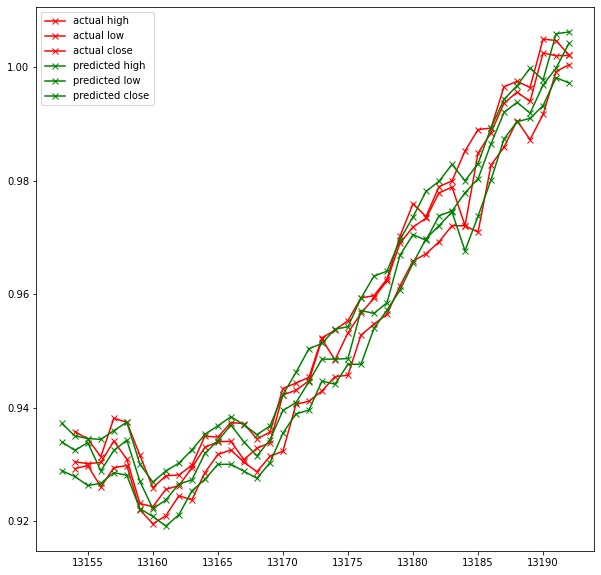

In [ ]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
#include actual high and low range
line1_h = plt.plot(df_t.test_high, label = 'actual high', marker='x', color='r')
line1_l = plt.plot(df_t.test_low, label = 'actual low', marker='x', color='r')
line1_c = plt.plot(df_t.test_close, label = 'actual close', marker='x', color='r')

#overlay predicted high and low and close
line2_ph = plt.plot(df_t.pred_h, label = 'predicted high', marker='x', color='g')
line2_pl = plt.plot(df_t.pred_l, label = 'predicted low', marker='x', color='g')
line2_pc = plt.plot(df_t.pred_c, label = 'predicted close', marker='x', color='g')


plt.legend()
plt.show()
 

In [ ]:
print(stop_for_sell)
print(stop_for_buy)

count    4.000000
mean     0.002917
std      0.002354
min      0.001250
25%      0.001685
50%      0.002010
75%      0.003242
90%      0.005137
95%      0.005768
99%      0.006274
max      0.006400
Name: stop_for_sell, dtype: float64
count    16.000000
mean      0.002139
std       0.001656
min       0.000040
25%       0.000728
50%       0.002260
75%       0.002915
90%       0.004125
95%       0.005215
99%       0.005515
max       0.005590
Name: stop_for_buy, dtype: float64


In [ ]:
# clears the model after a run so you can contrast new runs.
# predictor.unpersist_models('ag_predict_interval')
# predictor.save_space()
# predictor.delete_models(models_to_keep='best', dry_run=False)
%rm -rf agModels-predictHigh 
%rm -rf agModels-predictLow
%rm -rf agModels-predictClose
!ls



EURUSD_Daily_197101040000_202205160000.csv
GBPUSD_Daily_199305120000_202205160000.csv
sample_data
USDCHF_Daily_197101040000_202205160000.csv
USDJPY_Daily_197101040000_202205160000.csv
